# ARIMA Modeling for NFT Price Prediction

In [1]:
import numpy as np
import csv
import pandas as pd 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import importlib
import re
from os import path
import gzip
from collections import defaultdict
import networkx as nx
import seaborn as sns
from matplotlib import rcParams
from datetime import date
from datetime import datetime
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

Time-series forecasting models are the models that are capable of predicting future values based on previously observed values. Time-series forecasting is widely used for non-stationary data. Non-stationary data have statistical properties (e.g. the mean and standard deviation) that are not constant. Instead, these metrics vary over time.

These non-stationary input data (used as inputs to these models) are usually called time-series. A time series is a sequence of observations taken sequentially in time and is recorded on a discrete time scale. Some examples of time-series include the temperature values over time, stock price over time, price of a house over time etc. So, the input is a signal (time-series) that is defined by observations taken sequentially in time.

In [2]:
df = pd.read_csv('Data_API.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games
5,NaN,43107083.0,0x986ecc59dc28e84ad987a52e4a4fdade67d1fbb5f81b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=116&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '43107083.0')",Godsunchained,Games
6,NaN,7713824.0,0x72c1bfec2a020b5cb55ee3fc2f8ae1e66568ec881f62...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=190&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '7713824.0')",Godsunchained,Games
7,NaN,45951791.0,0x34baab28115bdadbcbc50846220060bb8e516f754c3b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=173&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '45951791.0')",Godsunchained,Games
8,NaN,5400581.0,0xf52ba58317f3ab62fb43da3e9d417fe4fa88bff86d9c...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c5968ee5ce21ad7324c97014fcb99f87f7fec6f,NaN,https://card.godsunchained.com/?id=27&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:28,NaN,"('Godsunchained', '5400581.0')",Godsunchained,Games
9,NaN,117891743.0,0xb70b159f02200125a258726694299931a8c69651053d...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:57:50,NaN,"('Godsunchained', '117891743.0')",Godsunchained,Games


In [4]:
df['index'] = np.arange(len(df))

In [5]:
len(df)

4495569

In [6]:
len(df["Unique_id_collection"].unique())

3649287

In [7]:
# group the nfts by number of transactions
summary_data = df.groupby('Unique_id_collection').count()
summary_data[['index']]

,index
Unique_id_collection,
"('0xuniverse', '100124')",1
"('0xuniverse', '100132')",1
"('0xuniverse', '100138')",1
"('0xuniverse', '10016')",2
"('0xuniverse', '100206')",1
...,...
"('zombieartist', '1099521575043')",1
"('zombiesperks', '1099521133207')",1
"('zombiesperks', '1099523337339')",1


In [8]:
series_nfts = df[df.duplicated(subset=['Unique_id_collection'], keep=False)]
len(series_nfts)

1500873

In [9]:
series_nfts.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
8,NaN,5400581.0,0xf52ba58317f3ab62fb43da3e9d417fe4fa88bff86d9c...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c5968ee5ce21ad7324c97014fcb99f87f7fec6f,NaN,https://card.godsunchained.com/?id=27&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:28,NaN,"('Godsunchained', '5400581.0')",Godsunchained,Games,8
10,NaN,12585149.0,0x7eef136b34651eafb976408dbef26c8895b301a9de10...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c5968ee5ce21ad7324c97014fcb99f87f7fec6f,NaN,https://card.godsunchained.com/?id=27&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:57:50,NaN,"('Godsunchained', '12585149.0')",Godsunchained,Games,10
11,NaN,1730148.0,0x8d26b80d7d225a95f4e9d4c88dcfe3046556f3159193...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c5968ee5ce21ad7324c97014fcb99f87f7fec6f,NaN,https://card.godsunchained.com/?id=27&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:57:27,NaN,"('Godsunchained', '1730148.0')",Godsunchained,Games,11
13,NaN,1712718.0,0x978fa79e007cfe213cae90689b4ebb97446f07cf5c17...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c5968ee5ce21ad7324c97014fcb99f87f7fec6f,NaN,https://card.godsunchained.com/?id=27&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:57:15,NaN,"('Godsunchained', '1712718.0')",Godsunchained,Games,13
29,NaN,8463296.0,0x7969aac4af1694775f9ecea614488ed7722789161cd4...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x05bd458b7c3fdbd6e1fb151bace8807e3935f061,NaN,https://card.godsunchained.com/?id=266&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:54:23,NaN,"('Godsunchained', '8463296.0')",Godsunchained,Games,29


In [10]:
# group nfts with 2+ transactions
summary_data = series_nfts.groupby('Unique_id_collection').count()
summary_data[['index']]

,index
Unique_id_collection,
"('0xuniverse', '10016')",2
"('0xuniverse', '10057')",2
"('0xuniverse', '104330')",2
"('0xuniverse', '114873')",2
"('0xuniverse', '12955')",2
...,...
"('zombaeseries', '1099528671681')",2
"('zombaeseries', '1099528807404')",2
"('zombieartist', '1099512373378')",2


<AxesSubplot:xlabel='index', ylabel='Count'>

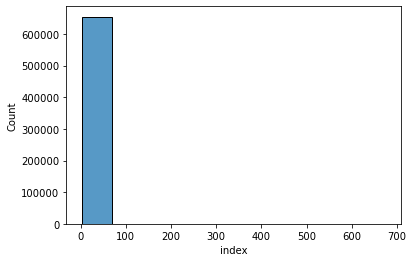

In [11]:
sns.histplot(data=summary_data, x='index', bins = 10)

We can see from the histogram that many NFTs are resold at low rates. This means that many NFTs have fewer resale transations.

In [12]:
summary_data["index"].unique()

array([  2,   3,   4,   5,   6,  53,  43,  38,  51,  57,  64,  40,  34,
        65,  49,  30,  42,  60,  52,  10,  50,  12,  23,   7,  33,  36,
        13,  17,  11,   9,  21,   8, 649, 626, 642, 660, 610, 621, 624,
       608, 628, 662, 667, 604, 647,  18, 502, 630, 636, 566, 576, 602,
       613, 676, 615,  15, 585, 617, 597, 586,  14])

In [13]:
rep_nft = summary_data[summary_data['index'] > 100]
rep_nft.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Collection_cleaned,Category,index
Unique_id_collection,,,,,,,,,,,,,,,,,,,,,
"('Cryptokitties', '1009482')",648,649,649,649,32,649,31,649,648,648,...,648,648,649,649,649,649,648,649,649,649
"('Cryptokitties', '1010032')",625,626,626,626,34,626,36,626,625,625,...,625,625,626,626,626,626,625,626,626,626
"('Cryptokitties', '1016910')",641,642,642,642,35,642,34,642,641,641,...,641,641,642,642,642,642,641,642,642,642
"('Cryptokitties', '1037945')",659,660,660,660,40,660,41,660,659,659,...,659,659,660,660,660,660,659,660,660,660
"('Cryptokitties', '1043670')",609,610,610,610,31,610,31,610,609,609,...,609,609,610,610,610,610,609,610,610,610


In [14]:
# only 32 nfts have over 100 resale transactions
len(rep_nft)

32

In [15]:
nft_list = rep_nft.index.to_list()

In [16]:
# subset main df to nfts with high resale transaction counts
nft_df = df[df['Unique_id_collection'].isin(nft_list)]

In [17]:
nft_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
655022,NaN,853115,0x3a75e1a4bd9c91ef28ab8f81debee8e5787297fbff33...,0xdd25963251fceb0a7bef9bb713eed260829f5656,NaN,0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-07-21 00:00:00,2018-07-21 19:44:55,NaN,"('Cryptokitties', '853115')",Cryptokittie,Art,655022
672587,NaN,882455,0xe68d037c8b408fcdcff3dd717fd3481d017bf5abe709...,0xc35a5fec6be6957899e15559be252db882220b37,NaN,0x3e7cf15f302fc407fc27489da12c8509d6e36c2f,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-08-14 00:00:00,2018-08-14 01:41:58,NaN,"('Cryptokitties', '882455')",Cryptokittie,Art,672587
680038,NaN,1043670,0x7e5b2ba4b0aa0798f3b0456e3f8d9c926d6781ba4b69...,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,NaN,0xefee683edf0a5d3e7710254f060bb085fe11a6ce,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-26 00:00:00,2018-09-26 22:47:37,NaN,"('Cryptokitties', '1043670')",Cryptokittie,Art,680038
681490,NaN,1037945,0xb99e6b2b1defa3ffd826dea94e4dc443a7c320c41948...,0x1e63a6146c8fa1a43964af901cb42aa48debc2b1,NaN,0xf636c2284d8618c020148f10cc20956ec4bf7ac2,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-24 00:00:00,2018-09-24 20:14:39,NaN,"('Cryptokitties', '1037945')",Cryptokittie,Art,681490
685965,NaN,1016910,0x2061e807bac4185d6fabea04f1291d5be17a65833741...,0x8783a1928476225bbc30f5655bd87d2c281ef07f,NaN,0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-19 00:00:00,2018-09-19 13:29:10,NaN,"('Cryptokitties', '1016910')",Cryptokittie,Art,685965
687876,NaN,966604,0x62fffe6601bb250cdc0974c3d5688ac7d01b95e698a5...,0x03b16ab6e23bdbeeab719d8e4c49d63674876253,NaN,0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-18 00:00:00,2018-09-18 18:08:47,NaN,"('Cryptokitties', '966604')",Cryptokittie,Art,687876
688351,NaN,1009482,0x4becd52ef544d53663168031fdee45e431a5de6d0065...,0xbae25a69a6eb7341ee834be7635e247e22a1e57a,NaN,0x0ce6d46ae8b514e62e7c47775e9319f03ecc7d63,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-17 00:00:00,2018-09-17 21:29:20,NaN,"('Cryptokitties', '1009482')",Cryptokittie,Art,688351
688959,NaN,1010032,0xeb59e1c1369641de43811a5f76e60af9184953e0930e...,0xa361d098ba12c72cac9a38f7f2ed441cc20aebca,NaN,0x7316e9cf94bef40d4981d66a5c41c38b6b32454c,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-16 00:00:00,2018-09-16 12:07:34,NaN,"('Cryptokitties', '1010032')",Cryptokittie,Art,688959
691635,NaN,965763,0xfe9eb548829a112be3ec85b34ea3dc16e85421ff8dd4...,0x9f60aa00b6531291702d0e1892ab31d5c150661c,NaN,0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-13 00:00:00,2018-09-13 06:09:44,NaN,"('Cryptokitties', '965763')",Cryptokittie,Art,691635
699035,NaN,945435,0x9c730cb2dbe6d477f3185ec2894ee8effc933f1c9df9...,0xc35a5fec6be6957899e15559be252db882220b37,NaN,0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-03 00:00:00,2018-09-03 21:18:41,NaN,"('Cryptokitties', '945435')",Cryptokittie,Art,699035


In [18]:
len(nft_df)

19897

In [19]:
# subset main df to nfts with mid-range transaction resale counts (50+)
mid_nft = summary_data[summary_data['index'] > 50]
mid_nft_list = mid_nft.index.to_list()
mid_nft_df = df[df['Unique_id_collection'].isin(mid_nft_list)]
mid_nft_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
655022,NaN,853115,0x3a75e1a4bd9c91ef28ab8f81debee8e5787297fbff33...,0xdd25963251fceb0a7bef9bb713eed260829f5656,NaN,0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-07-21 00:00:00,2018-07-21 19:44:55,NaN,"('Cryptokitties', '853115')",Cryptokittie,Art,655022
672587,NaN,882455,0xe68d037c8b408fcdcff3dd717fd3481d017bf5abe709...,0xc35a5fec6be6957899e15559be252db882220b37,NaN,0x3e7cf15f302fc407fc27489da12c8509d6e36c2f,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-08-14 00:00:00,2018-08-14 01:41:58,NaN,"('Cryptokitties', '882455')",Cryptokittie,Art,672587
680038,NaN,1043670,0x7e5b2ba4b0aa0798f3b0456e3f8d9c926d6781ba4b69...,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,NaN,0xefee683edf0a5d3e7710254f060bb085fe11a6ce,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-26 00:00:00,2018-09-26 22:47:37,NaN,"('Cryptokitties', '1043670')",Cryptokittie,Art,680038
681490,NaN,1037945,0xb99e6b2b1defa3ffd826dea94e4dc443a7c320c41948...,0x1e63a6146c8fa1a43964af901cb42aa48debc2b1,NaN,0xf636c2284d8618c020148f10cc20956ec4bf7ac2,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-24 00:00:00,2018-09-24 20:14:39,NaN,"('Cryptokitties', '1037945')",Cryptokittie,Art,681490
685965,NaN,1016910,0x2061e807bac4185d6fabea04f1291d5be17a65833741...,0x8783a1928476225bbc30f5655bd87d2c281ef07f,NaN,0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-19 00:00:00,2018-09-19 13:29:10,NaN,"('Cryptokitties', '1016910')",Cryptokittie,Art,685965
687876,NaN,966604,0x62fffe6601bb250cdc0974c3d5688ac7d01b95e698a5...,0x03b16ab6e23bdbeeab719d8e4c49d63674876253,NaN,0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-18 00:00:00,2018-09-18 18:08:47,NaN,"('Cryptokitties', '966604')",Cryptokittie,Art,687876
688351,NaN,1009482,0x4becd52ef544d53663168031fdee45e431a5de6d0065...,0xbae25a69a6eb7341ee834be7635e247e22a1e57a,NaN,0x0ce6d46ae8b514e62e7c47775e9319f03ecc7d63,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-17 00:00:00,2018-09-17 21:29:20,NaN,"('Cryptokitties', '1009482')",Cryptokittie,Art,688351
688959,NaN,1010032,0xeb59e1c1369641de43811a5f76e60af9184953e0930e...,0xa361d098ba12c72cac9a38f7f2ed441cc20aebca,NaN,0x7316e9cf94bef40d4981d66a5c41c38b6b32454c,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-16 00:00:00,2018-09-16 12:07:34,NaN,"('Cryptokitties', '1010032')",Cryptokittie,Art,688959
691635,NaN,965763,0xfe9eb548829a112be3ec85b34ea3dc16e85421ff8dd4...,0x9f60aa00b6531291702d0e1892ab31d5c150661c,NaN,0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-13 00:00:00,2018-09-13 06:09:44,NaN,"('Cryptokitties', '965763')",Cryptokittie,Art,691635
699035,NaN,945435,0x9c730cb2dbe6d477f3185ec2894ee8effc933f1c9df9...,0xc35a5fec6be6957899e15559be252db882220b37,NaN,0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-03 00:00:00,2018-09-03 21:18:41,NaN,"('Cryptokitties', '945435')",Cryptokittie,Art,699035


In [20]:
summary_data_new = nft_df.groupby('Unique_id_collection').count()
summary_data_new[['index']]

,index
Unique_id_collection,
"('Cryptokitties', '1009482')",649
"('Cryptokitties', '1010032')",626
"('Cryptokitties', '1016910')",642
"('Cryptokitties', '1037945')",660
"('Cryptokitties', '1043670')",610
"('Cryptokitties', '1067790')",621
"('Cryptokitties', '1080953')",624
"('Cryptokitties', '1151860')",660
"('Cryptokitties', '853115')",608


In [21]:
# subset main df to nfts with mid-range transaction resale counts (20-40)
low_nft = summary_data[summary_data['index'] < 40]
low_nft = low_nft[low_nft['index'] > 20]
low_nft_list = low_nft.index.to_list()
low_nft_df = df[df['Unique_id_collection'].isin(low_nft_list)]
low_nft_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
4192509,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,4657,0x42d2c512029a8869482ed70105c1d4adc1ce0ac3a6f4...,0xfe5745fe855e49db6ff78c07b5a3c9b496ceffdc,NaN,0x9879497017fa2026dae2f58e5b6a50f96490a034,TradeFederation,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-04-28 00:00:00,2018-04-28 14:09:15,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '4657')",Cryptobot,Games,4192509
4192512,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,5379,0x117a1eaade03e8089c3edfdcd74d1e796f55da260d04...,0xfe5745fe855e49db6ff78c07b5a3c9b496ceffdc,NaN,0x9879497017fa2026dae2f58e5b6a50f96490a034,TradeFederation,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-04-28 00:00:00,2018-04-28 14:07:47,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '5379')",Cryptobot,Games,4192512
4192520,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,4524,0x308a9756332c501dcb3e3c524ac8a1150a1926131906...,0xfe5745fe855e49db6ff78c07b5a3c9b496ceffdc,NaN,0x9879497017fa2026dae2f58e5b6a50f96490a034,TradeFederation,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-04-28 00:00:00,2018-04-28 14:02:41,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '4524')",Cryptobot,Games,4192520
4192526,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,4264,0x169fb3e02fbc6bb7a7f022a394aa5ce8c790c2243ef8...,0xfe5745fe855e49db6ff78c07b5a3c9b496ceffdc,NaN,0x9879497017fa2026dae2f58e5b6a50f96490a034,TradeFederation,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-04-28 00:00:00,2018-04-28 13:53:57,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '4264')",Cryptobot,Games,4192526
4201535,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,5621,0x22ce53c7b5766e7fcb73612432efd67285238ef2a0e8...,0x5aeb1fcb423e89f5258bb653569aa671aa68f6e6,Ashe,0x59fee25dabb0134501136b1f0d6282192349b082,NaN,https://storage.googleapis.com/opensea-prod.ap...,https://cryptobots.me/img/5621,https://storage.googleapis.com/opensea-prod.ap...,...,NaN,Cryptobots,OpenSea,2018-04-13 00:00:00,2018-04-13 15:49:44,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '5621')",Cryptobot,Games,4201535
4202433,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,4657,0x762714bd8a4eacf49337daa3d77cf8efe9d7fb096529...,0xd825646896420c261447171455658b4b37bda848,NaN,0xfe5745fe855e49db6ff78c07b5a3c9b496ceffdc,NaN,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-04-12 00:00:00,2018-04-12 16:35:51,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '4657')",Cryptobot,Games,4202433
4202457,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,5379,0x63ad9161c614f9762add1fbcf8fa2347f5b4571ab609...,0xbf55e7d791605728d49bf9216b2b05aa83fca2c7,NaN,0xfe5745fe855e49db6ff78c07b5a3c9b496ceffdc,NaN,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-04-12 00:00:00,2018-04-12 15:45:14,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '5379')",Cryptobot,Games,4202457
4203120,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,5379,0x8705f36442e33fd6c17217bcdb2a578ff278df6d1ef2...,0x0be1aa78e01efa067e131432090121187fc167ea,NaN,0xbf55e7d791605728d49bf9216b2b05aa83fca2c7,NaN,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-04-11 00:00:00,2018-04-11 19:58:13,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '5379')",Cryptobot,Games,4203120
4203121,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,4657,0xc4d776295de9072628cf183d8e8f1835d2c25bef399d...,0xd4c208003204cacd9266ac69d279800c38350ad4,NaN,0xd825646896420c261447171455658b4b37bda848,NaN,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-04-11 00:00:00,2018-04-11 19:58:20,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '4657')",Cryptobot,Games,4203121
4203125,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,4657,0x4a2d8d89e1d00736a0f5df92ba986974ccf13b82b714...,0x92f5af834f3fc8fae6e485e326b70ffd929abd

In [22]:
summary_data_new = low_nft_df.groupby('Unique_id_collection').count()
summary_data_new[['index']]

,index
Unique_id_collection,
"('Coins-steel', '20')",38
"('Coins-steel', '26')",34
"('Coins-steel', '30')",30
"('Cryptobots', '4264')",23
"('Cryptobots', '4524')",23
"('Cryptobots', '4657')",33
"('Cryptobots', '5379')",34
"('Cryptobots', '5621')",36
"('Cryptobots', '7818')",21


<AxesSubplot:xlabel='index', ylabel='Count'>

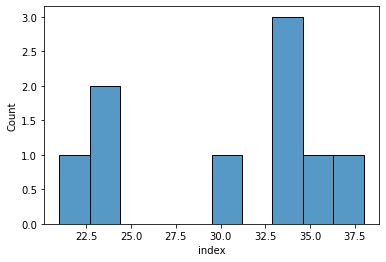

In [23]:
sns.histplot(data=summary_data_new, x='index', bins = 10)

In [24]:
summary_data_mid = mid_nft_df.groupby('Unique_id_collection').count()
summary_data_mid[['index']].head(10)

,index
Unique_id_collection,
"('Coins-steel', '18')",53
"('Coins-steel', '21')",53
"('Coins-steel', '22')",51
"('Coins-steel', '23')",57
"('Coins-steel', '24')",64
"('Coins-steel', '27')",65
"('Coins-steel', '28')",53
"('Coins-steel', '33')",60
"('Coins-steel', '34')",52


### ARIMA Model for Individual NFTs

A famous and widely used forecasting method for time-series prediction is the AutoRegressive Integrated Moving Average (ARIMA) model. ARIMA models are capable of capturing a suite of different standard temporal structures in time-series data.

- AR: < Auto Regressive > means that the model uses the dependent relationship between an observation and some predefined number of lagged observations (also known as “time lag” or “lag”).
- I:< Integrated > means that the model employs differencing of raw observations (e.g. it subtracts an observation from an observation at the previous time step) in order to make the time-series stationary.
- MA: < Moving Average > means that the model exploits the relationship between the residual error and the observations.

The standard ARIMA models expect as input parameters 3 arguments i.e. p,d,q.
- p is the number of lag observations.
- d is the degree of differencing.
- q is the size/width of the moving average window.

ARIMA(p,d,q) models are designed specifically to operate on a series of data with a single data point for each interval in the series. 

![ARIMA_equation.png](ARIMA_equation.png)

In the ARIMA formula, everything is operating on the $X_t$ variable or on the error term $(e_t)$. So it's not designed for $X, Y,$ and $Z$.

To combine multiple datapoints of different variables into a single model, then we would consider other models.

First, we will construct an ARIMA model using 'Price_USD' data from a single NFT with a high transaction count (600+). This will provide the model with many data points over a period of time.

In [25]:
nft_name = []
nft_type = []
trans_count = []
mse_scores = []
binary_acc = []
binary_prec = []
binary_recall = []
binary_f1score = []

In [26]:
# ('Cryptokitties', '965763') has 667 transactions
C965763_df = nft_df[nft_df['Unique_id_collection'] == "('Cryptokitties', '965763')"]
C965763_df.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
691635,NaN,965763,0xfe9eb548829a112be3ec85b34ea3dc16e85421ff8dd4...,0x9f60aa00b6531291702d0e1892ab31d5c150661c,NaN,0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2018-09-13 00:00:00,2018-09-13 06:09:44,NaN,"('Cryptokitties', '965763')",Cryptokittie,Art,691635
4267532,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xfe9eb548829a112be3ec85b34ea3dc16e85421ff8dd4...,0x9f60aa00b6531291702d0e1892ab31d5c150661c,QwagLabs_CryptoPearls,0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,Hey! Ho! Let's go. I'm Ashes Squeenana. I'm fr...,Cryptokitties,OpenSea,2018-09-17 00:00:00,2018-09-17 14:19:00,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4267532
4362426,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x7c9cd041dd15fcab1ea8a59104d2e7a311c04f8a14d7...,0xa21e0974137bf8400eb7dca606d9dcb190d79ed9,NaN,0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,Hey! Ho! Let's go. I'm Ashes Squeenana. I'm fr...,Cryptokitties,OpenSea,2019-02-28 00:00:00,2019-02-28 21:28:04,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4362426
4362577,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xecc3ed5880bf6542d3b04089afab061fac834e624135...,0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee,NaN,0xa21e0974137bf8400eb7dca606d9dcb190d79ed9,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,Hey! Ho! Let's go. I'm Ashes Squeenana. I'm fr...,Cryptokitties,OpenSea,2019-02-28 00:00:00,2019-02-28 17:28:03,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4362577
4362713,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x2743f3b8fe951015678126c7d4f703d871aa74783151...,0x6a47b60c377450a460d3eb828d534ee66eead668,NaN,0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,Hey! Ho! Let's go. I'm Ashes Squeenana. I'm fr...,Cryptokitties,OpenSea,2019-02-28 00:00:00,2019-02-28 13:33:07,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4362713


In [27]:
C965763_df['Previous_Price_USD'] = C965763_df['Price_USD'].shift(1)
C965763_df.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,Previous_Price_USD
691635,NaN,965763,0xfe9eb548829a112be3ec85b34ea3dc16e85421ff8dd4...,0x9f60aa00b6531291702d0e1892ab31d5c150661c,NaN,0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,Cryptokitties,Cryptokitties,2018-09-13 00:00:00,2018-09-13 06:09:44,NaN,"('Cryptokitties', '965763')",Cryptokittie,Art,691635,NaN
4267532,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xfe9eb548829a112be3ec85b34ea3dc16e85421ff8dd4...,0x9f60aa00b6531291702d0e1892ab31d5c150661c,QwagLabs_CryptoPearls,0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,Cryptokitties,OpenSea,2018-09-17 00:00:00,2018-09-17 14:19:00,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4267532,37.62810
4362426,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x7c9cd041dd15fcab1ea8a59104d2e7a311c04f8a14d7...,0xa21e0974137bf8400eb7dca606d9dcb190d79ed9,NaN,0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,Cryptokitties,OpenSea,2019-02-28 00:00:00,2019-02-28 21:28:04,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4362426,37.62810
4362577,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xecc3ed5880bf6542d3b04089afab061fac834e624135...,0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee,NaN,0xa21e0974137bf8400eb7dca606d9dcb190d79ed9,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,Cryptokitties,OpenSea,2019-02-28 00:00:00,2019-02-28 17:28:03,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4362577,31.77486
4362713,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x2743f3b8fe951015678126c7d4f703d871aa74783151...,0x6a47b60c377450a460d3eb828d534ee66eead668,NaN,0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,Cryptokitties,OpenSea,2019-02-28 00:00:00,2019-02-28 13:33:07,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4362713,31.77486
4362807,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x62b94a140df09a7f8b8d8532504461e7ef1a76b2ed1a...,0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a,NaN,0x6a47b60c377450a460d3eb828d534ee66eead668,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,Cryptokitties,OpenSea,2019-02-28 00:00:00,2019-02-28 09:36:08,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4362807,31.77486
4362912,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x5a725d11419fb20fca85bc4fee2926ac93c2c95483ac...,0x1c1ef71445010114f41ac1feb32dbf5d7281e90f,NaN,0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,Cryptokitties,OpenSea,2019-02-28 00:00:00,2019-02-28 05:52:12,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4362912,31.77486
4363048,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xdc93a742986a002324e51cfc0c50e9676961ac9aee17...,0x8acc1421ec98689461ff5777de8ad6648dc

<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_USD'>

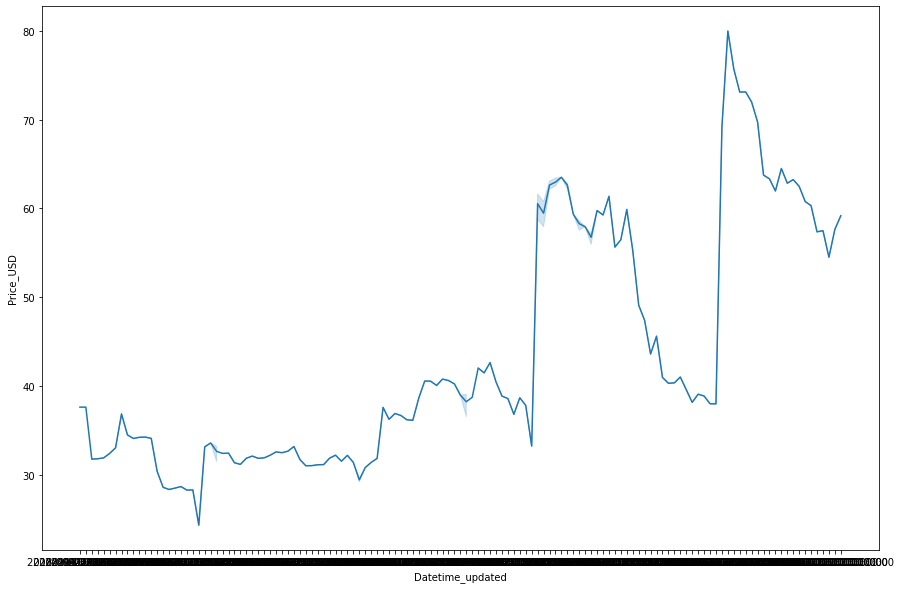

In [28]:
plt.figure(figsize=(15,10))
sns.lineplot(data=C965763_df, x="Datetime_updated", y="Price_USD")

https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70

Before building the ARIMA model, let’s see if there is some cross-correlation in our data.

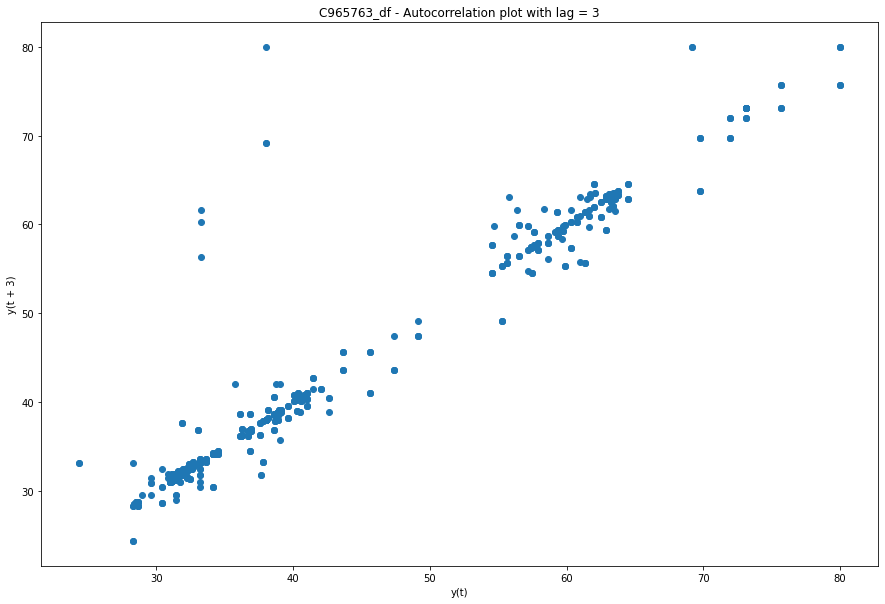

In [29]:
plt.figure(figsize=(15,10))
lag_plot(C965763_df['Price_USD'], lag=3)
plt.title('C965763_df - Autocorrelation plot with lag = 3')
plt.show()

We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).

In [30]:
# divide the data into a training (70 % ) and test (30%) set
train_df, test_df = C965763_df[0:int(len(C965763_df)*0.7)], C965763_df[int(len(C965763_df)*0.7):]

In [31]:
training_data = train_df['Price_USD'].values
test_data = test_df['Price_USD'].values

In [32]:
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

A rolling forecasting procedure is required given the dependence on observations in prior time steps for differencing and the AR model. To this end, we re-create the ARIMA model after each new observation is received.

In [33]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

In [34]:
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 6.990523738014649


In [35]:
nft_name.append('Cryptokitties - 965763') 
nft_type.append('Individual')
trans_count.append(667)
mse_scores.append(MSE_error)

In [36]:
results_df = test_df.assign(Predicted_Price_USD = model_predictions)
results_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,Previous_Price_USD,Predicted_Price_USD
4458765,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x89dede59bb80e43fdd755f2ee017d877c3775daa8eed...,0x463215edb66fb6a8f0c979e739a731977617699f,NaN,0x7316e9cf94bef40d4981d66a5c41c38b6b32454c,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,OpenSea,2019-05-15 00:00:00,2019-05-15 06:21:58,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4458765,55.28601,55.306397
4458857,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x2361f5b58ab2618fb70c7bd1f154a655208faacedc57...,0xa21e0974137bf8400eb7dca606d9dcb190d79ed9,NaN,0x463215edb66fb6a8f0c979e739a731977617699f,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,OpenSea,2019-05-15 00:00:00,2019-05-15 02:26:51,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4458857,55.28601,55.286010
4458969,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x411951a349e3cef68bf1c36ddd8aab5f9db892626970...,0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0,NaN,0xa21e0974137bf8400eb7dca606d9dcb190d79ed9,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,OpenSea,2019-05-14 00:00:00,2019-05-14 22:29:06,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4458969,55.28601,55.286010
4459085,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xc33a883956a73b5c5277c4ff3a75377457f745fb9fb3...,0x8acc1421ec98689461ff5777de8ad6648dc6d643,NaN,0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,OpenSea,2019-05-14 00:00:00,2019-05-14 18:32:25,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459085,49.11192,49.284042
4459274,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xe6b48a596f969ae04f4f98a504a5dbc7cab13ef9bb51...,0xbabda06088c242fb2a763aa7cc99706cb77ba735,NaN,0x8acc1421ec98689461ff5777de8ad6648dc6d643,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,OpenSea,2019-05-14 00:00:00,2019-05-14 14:32:54,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459274,49.11192,49.978145
4459389,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x74817cdcc156419a5ac587edcd1ab7f4f2d7466a2cb1...,0x87b77fabfeb869150b8e1b9462603f9a639c5fae,NaN,0xbabda06088c242fb2a763aa7cc99706cb77ba735,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,OpenSea,2019-05-14 00:00:00,2019-05-14 10:38:05,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459389,49.11192,48.593994
4459870,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x1c9d192ff2f9210b65a84bff44719149ad4749fdcbb3...,0xf5aee6d7b838d5ede8aa65d31dbc11116545180c,NaN,0x87b77fabfeb869150b8e1b9462603f9a639c5fae,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,OpenSea,2019-05-13 00:00:00,2019-05-13 14:48:07,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459870,49.11192,49.136019
4459

In [37]:
results_df['Pred_Price_Difference'] = results_df['Predicted_Price_USD']  - results_df['Previous_Price_USD']
results_df['Actual_Price_Difference'] = results_df['Price_USD']  - results_df['Previous_Price_USD']
results_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,Previous_Price_USD,Predicted_Price_USD,Pred_Price_Difference,Actual_Price_Difference
4458765,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x89dede59bb80e43fdd755f2ee017d877c3775daa8eed...,0x463215edb66fb6a8f0c979e739a731977617699f,NaN,0x7316e9cf94bef40d4981d66a5c41c38b6b32454c,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,2019-05-15 06:21:58,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4458765,55.28601,55.306397,0.020387,0.00000
4458857,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x2361f5b58ab2618fb70c7bd1f154a655208faacedc57...,0xa21e0974137bf8400eb7dca606d9dcb190d79ed9,NaN,0x463215edb66fb6a8f0c979e739a731977617699f,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,2019-05-15 02:26:51,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4458857,55.28601,55.286010,0.000000,0.00000
4458969,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x411951a349e3cef68bf1c36ddd8aab5f9db892626970...,0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0,NaN,0xa21e0974137bf8400eb7dca606d9dcb190d79ed9,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,2019-05-14 22:29:06,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4458969,55.28601,55.286010,0.000000,-6.17409
4459085,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xc33a883956a73b5c5277c4ff3a75377457f745fb9fb3...,0x8acc1421ec98689461ff5777de8ad6648dc6d643,NaN,0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,2019-05-14 18:32:25,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459085,49.11192,49.284042,0.172122,0.00000
4459274,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xe6b48a596f969ae04f4f98a504a5dbc7cab13ef9bb51...,0xbabda06088c242fb2a763aa7cc99706cb77ba735,NaN,0x8acc1421ec98689461ff5777de8ad6648dc6d643,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,2019-05-14 14:32:54,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459274,49.11192,49.978145,0.866225,0.00000
4459389,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x74817cdcc156419a5ac587edcd1ab7f4f2d7466a2cb1...,0x87b77fabfeb869150b8e1b9462603f9a639c5fae,NaN,0xbabda06088c242fb2a763aa7cc99706cb77ba735,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,2019-05-14 10:38:05,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459389,49.11192,48.593994,-0.517926,0.00000
4459870,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x1c9d192ff2f9210b65a84bff44719149ad4749fdcbb3...,0xf5aee6d7b838d5ede8aa65d31dbc11116545180c,NaN,0x87b77fabfeb869150b8e1b9462603f9a639c5fae,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,2019-05-13 14:48:07,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459870,49.11192,49.136019,0.024099,-1.71873
4459964,0x06012c8cf97bead5deae237070f9587f8e7a266d,96576

In [38]:
results_df['Pred_Price_Change'] = np.where(results_df['Pred_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Actual_Price_Change'] = np.where(results_df['Actual_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Unique_id_collection,Collection_cleaned,Category,index,Previous_Price_USD,Predicted_Price_USD,Pred_Price_Difference,Actual_Price_Difference,Pred_Price_Change,Actual_Price_Change
4458765,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x89dede59bb80e43fdd755f2ee017d877c3775daa8eed...,0x463215edb66fb6a8f0c979e739a731977617699f,NaN,0x7316e9cf94bef40d4981d66a5c41c38b6b32454c,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,"('Cryptokitties', '965763')",Cryptokittie,Art,4458765,55.28601,55.306397,0.020387,0.00000,Positive,Positive
4458857,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x2361f5b58ab2618fb70c7bd1f154a655208faacedc57...,0xa21e0974137bf8400eb7dca606d9dcb190d79ed9,NaN,0x463215edb66fb6a8f0c979e739a731977617699f,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,"('Cryptokitties', '965763')",Cryptokittie,Art,4458857,55.28601,55.286010,0.000000,0.00000,Positive,Positive
4458969,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x411951a349e3cef68bf1c36ddd8aab5f9db892626970...,0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0,NaN,0xa21e0974137bf8400eb7dca606d9dcb190d79ed9,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,"('Cryptokitties', '965763')",Cryptokittie,Art,4458969,55.28601,55.286010,0.000000,-6.17409,Positive,Negative
4459085,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xc33a883956a73b5c5277c4ff3a75377457f745fb9fb3...,0x8acc1421ec98689461ff5777de8ad6648dc6d643,NaN,0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459085,49.11192,49.284042,0.172122,0.00000,Positive,Positive
4459274,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xe6b48a596f969ae04f4f98a504a5dbc7cab13ef9bb51...,0xbabda06088c242fb2a763aa7cc99706cb77ba735,NaN,0x8acc1421ec98689461ff5777de8ad6648dc6d643,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459274,49.11192,49.978145,0.866225,0.00000,Positive,Positive
4459389,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x74817cdcc156419a5ac587edcd1ab7f4f2d7466a2cb1...,0x87b77fabfeb869150b8e1b9462603f9a639c5fae,NaN,0xbabda06088c242fb2a763aa7cc99706cb77ba735,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459389,49.11192,48.593994,-0.517926,0.00000,Negative,Positive
4459870,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0x1c9d192ff2f9210b65a84bff44719149ad4749fdcbb3...,0xf5aee6d7b838d5ede8aa65d31dbc11116545180c,NaN,0x87b77fabfeb869150b8e1b9462603f9a639c5fae,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459870,49.11192,49.136019,0.024099,-1.71873,Positive,Negative
4459964,0x06012c8cf97bead5deae237070f9587f8e7a266d,965763,0xc99b0e5e13318df65505488aac46e49283e4da0b4f9a...,0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04,NaN,0xf5aee6d7b838d5ede8aa65d31dbc11116545180c,NaN,https://lh3.googleusercontent.com/yeqH5r517R1h...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yeqH5r517R1h...,...,"('Cryptokitties', '965763')",Cryptokittie,Art,4459964,47.39319,47

In [39]:
results_df['Pred_Price_Change'].tail(1)

4495435    Positive
Name: Pred_Price_Change, dtype: object

In [40]:
acc_count = 0
# initialize counters
FP = 0.0 # false positives
FN = 0.0 # false negatives
TP = 0.0 # true positives
TN = 0.0 # true negatives

for index, row in results_df.iterrows():
    pred_change = row['Pred_Price_Change']
    actual_change = row['Actual_Price_Change']
    
    # 1 - positive case & 0 - negative case
    if actual_change == pred_change:
        #TP
        if pred_change == 'Positive':
            TP += 1
        #TN
        else:
            TN += 1
    else:
        #FP - actual = 1 & pred = 0
        if pred_change == 'Positive':
            FP += 1      
        #FN - actual = 0 & pred = 1
        else:
            FN += 1
    
    if pred_change == actual_change:
        acc_count += 1

#accuracy = acc_count/len(results_df)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)
denom = 0.5 * (FP + FN)
FScore = TP / (TP + denom) 

binary_acc.append(accuracy)
binary_prec.append(precision)
binary_recall.append(recall)
binary_f1score.append(FScore)
print("Accuracy: ", accuracy)

Accuracy:  0.5373134328358209


The MSE of the test set is small, meaning that the precise prediction for this given NFT is quite accurate.

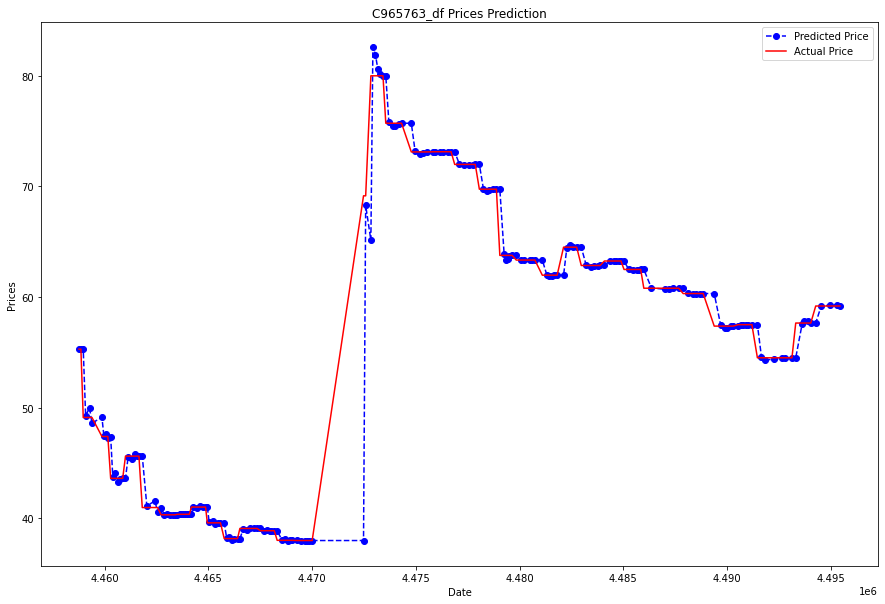

In [41]:
plt.figure(figsize=(15,10))
test_set_range = C965763_df[int(len(C965763_df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('C965763_df Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

Our ARIMA model results in appreciable results. This model offers a good prediction accuracy and to be relatively fast compared to other alternatives, in terms of training/fitting time and complexity.

##### Effect of Crypto vs USD

Now we can take a look at the effect of using the Crypto price of the NFT, compared to USD.

<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_Crypto'>

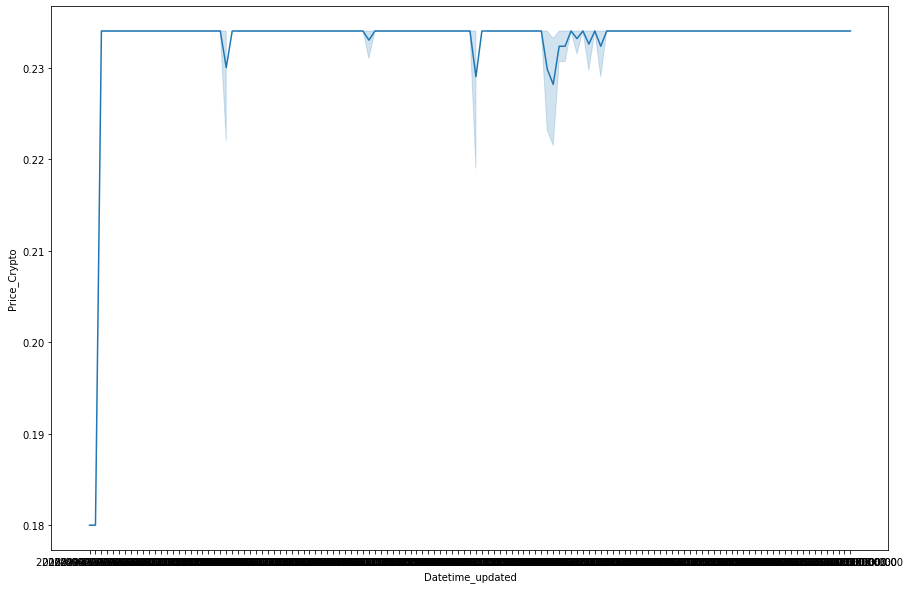

In [42]:
plt.figure(figsize=(15,10))
sns.lineplot(data=C965763_df, x="Datetime_updated", y="Price_Crypto")

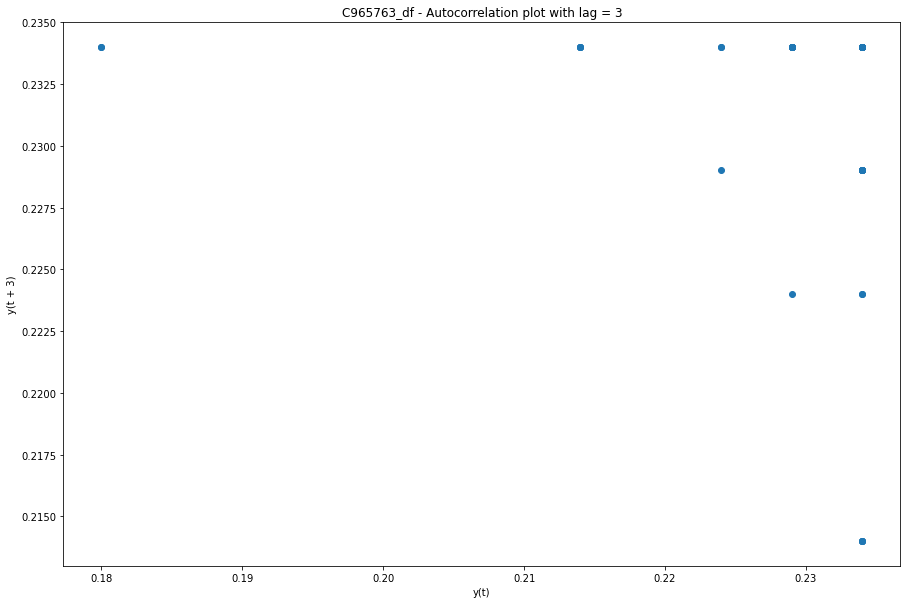

In [43]:
plt.figure(figsize=(15,10))
lag_plot(C965763_df['Price_Crypto'], lag=3)
plt.title('C965763_df - Autocorrelation plot with lag = 3')
plt.show()

Based on the auto-correlation plot, we can see that ARIMA might not be a good model to apply for this type of indicator variable.

Next, we can run the same ARIMA model (on 'Price_USD') for another NFT with similarly a high transaction count. This will help confirm our results.

In [44]:
#('Etheremon', '43995') has 676 transactions

E43995_df = nft_df[nft_df['Unique_id_collection'] == "('Etheremon', '43995')"]
E43995_df.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
4318067,0x5d00d312e171be5342067c09bae883f9bcb2003b,43995,0x1765b44b677d09a1aabf7f3feb081719e191b3cb1de3...,0x165b440662b38c8c2d2af9fca313d3af3f479851,165,0xfe272af6c115a955a03d4eed8be845e292bbda28,NaN,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,...,NaN,Etheremon,OpenSea,2018-12-20 00:00:00,2018-12-20 13:05:25,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', '43995')",Etheremon,Games,4318067
4362427,0x5d00d312e171be5342067c09bae883f9bcb2003b,43995,0x72ef325e0324abd54815d4786bb0b96b301112aa3bc2...,0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28,trading,0x87b77fabfeb869150b8e1b9462603f9a639c5fae,NaN,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,...,NaN,Etheremon,OpenSea,2019-02-28 00:00:00,2019-02-28 21:22:03,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', '43995')",Etheremon,Games,4362427
4362583,0x5d00d312e171be5342067c09bae883f9bcb2003b,43995,0x4ad6036329593cadfce5c36293f47dca2f4d6bdbcfc1...,0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8,NaN,0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28,trading,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,...,NaN,Etheremon,OpenSea,2019-02-28 00:00:00,2019-02-28 17:22:39,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', '43995')",Etheremon,Games,4362583
4362718,0x5d00d312e171be5342067c09bae883f9bcb2003b,43995,0xe60abba38ed656426e13cae5ad87d0764920cc280051...,0x1c1ef71445010114f41ac1feb32dbf5d7281e90f,NaN,0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8,NaN,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,...,NaN,Etheremon,OpenSea,2019-02-28 00:00:00,2019-02-28 13:27:58,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', '43995')",Etheremon,Games,4362718
4362810,0x5d00d312e171be5342067c09bae883f9bcb2003b,43995,0x50d03084db6f348c28007d9c1fd840582cd0db21edff...,0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee,NaN,0x1c1ef71445010114f41ac1feb32dbf5d7281e90f,NaN,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,...,NaN,Etheremon,OpenSea,2019-02-28 00:00:00,2019-02-28 09:26:40,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', '43995')",Etheremon,Games,4362810


In [45]:
E43995_df['Previous_Price_USD'] = E43995_df['Price_USD'].shift(1)
E43995_df.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,Previous_Price_USD
4318067,0x5d00d312e171be5342067c09bae883f9bcb2003b,43995,0x1765b44b677d09a1aabf7f3feb081719e191b3cb1de3...,0x165b440662b38c8c2d2af9fca313d3af3f479851,165,0xfe272af6c115a955a03d4eed8be845e292bbda28,NaN,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,...,Etheremon,OpenSea,2018-12-20 00:00:00,2018-12-20 13:05:25,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', '43995')",Etheremon,Games,4318067,NaN
4362427,0x5d00d312e171be5342067c09bae883f9bcb2003b,43995,0x72ef325e0324abd54815d4786bb0b96b301112aa3bc2...,0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28,trading,0x87b77fabfeb869150b8e1b9462603f9a639c5fae,NaN,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,...,Etheremon,OpenSea,2019-02-28 00:00:00,2019-02-28 21:22:03,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', '43995')",Etheremon,Games,4362427,10.93200
4362583,0x5d00d312e171be5342067c09bae883f9bcb2003b,43995,0x4ad6036329593cadfce5c36293f47dca2f4d6bdbcfc1...,0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8,NaN,0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28,trading,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,...,Etheremon,OpenSea,2019-02-28 00:00:00,2019-02-28 17:22:39,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', '43995')",Etheremon,Games,4362583,21.59061
4362718,0x5d00d312e171be5342067c09bae883f9bcb2003b,43995,0xe60abba38ed656426e13cae5ad87d0764920cc280051...,0x1c1ef71445010114f41ac1feb32dbf5d7281e90f,NaN,0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8,NaN,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,...,Etheremon,OpenSea,2019-02-28 00:00:00,2019-02-28 13:27:58,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', '43995')",Etheremon,Games,4362718,21.59061
4362810,0x5d00d312e171be5342067c09bae883f9bcb2003b,43995,0x50d03084db6f348c28007d9c1fd840582cd0db21edff...,0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee,NaN,0x1c1ef71445010114f41ac1feb32dbf5d7281e90f,NaN,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/BTmQVc1Rmcee...,...,Etheremon,OpenSea,2019-02-28 00:00:00,2019-02-28 09:26:40,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', '43995')",Etheremon,Games,4362810,21.59061


<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_USD'>

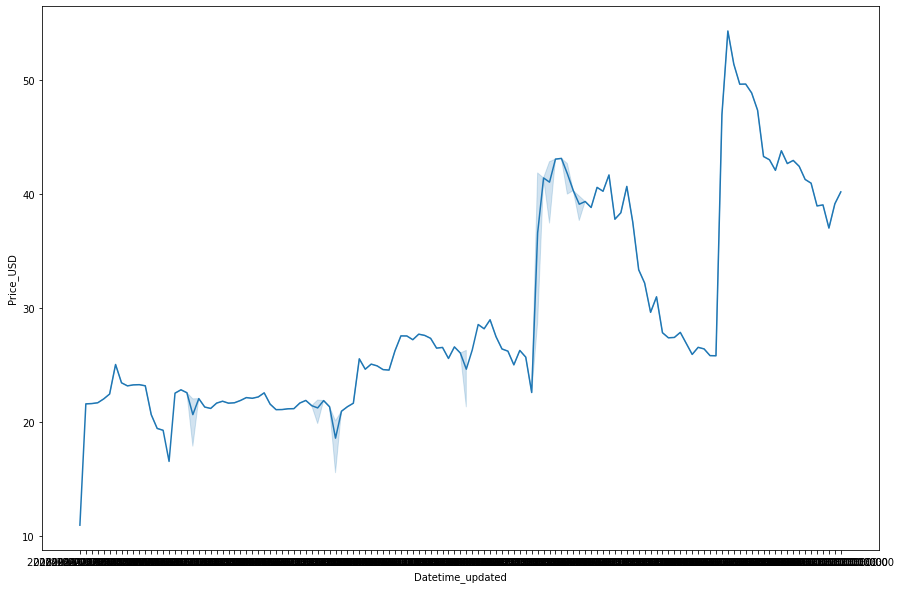

In [46]:
plt.figure(figsize=(15,10))
sns.lineplot(data=E43995_df, x="Datetime_updated", y="Price_USD")

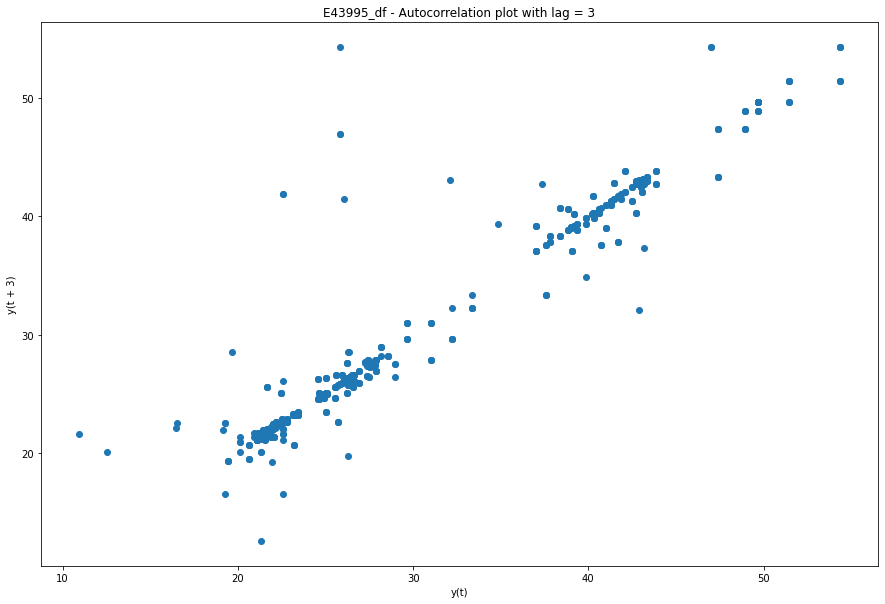

In [47]:
plt.figure(figsize=(15,10))
lag_plot(E43995_df['Price_USD'], lag=3)
plt.title('E43995_df - Autocorrelation plot with lag = 3')
plt.show()

We can again confirm that ARIMA is going to be a good model as there is auto-correlation in the data.

In [48]:
train_df, test_df = E43995_df[0:int(len(E43995_df)*0.7)], E43995_df[int(len(E43995_df)*0.7):]

training_data = train_df['Price_USD'].values
test_data = test_df['Price_USD'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
 
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 4.501662928672594


In [49]:
nft_name.append('Etheremon - 43995')  
nft_type.append('Individual')
trans_count.append(676)
mse_scores.append(MSE_error)

In [50]:
results_df = test_df.assign(Predicted_Price_USD = model_predictions) 
results_df['Pred_Price_Difference'] = results_df['Predicted_Price_USD']  - results_df['Previous_Price_USD']
results_df['Actual_Price_Difference'] = results_df['Price_USD']  - results_df['Previous_Price_USD']
results_df['Pred_Price_Change'] = np.where(results_df['Pred_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Actual_Price_Change'] = np.where(results_df['Actual_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Pred_Price_Change'].tail(1)

4495440    Positive
Name: Pred_Price_Change, dtype: object

In [51]:
acc_count = 0
# initialize counters
FP = 0.0 # false positives
FN = 0.0 # false negatives
TP = 0.0 # true positives
TN = 0.0 # true negatives

for index, row in results_df.iterrows():
    pred_change = row['Pred_Price_Change']
    actual_change = row['Actual_Price_Change']
    
    # 1 - positive case & 0 - negative case
    if actual_change == pred_change:
        #TP
        if pred_change == 'Positive':
            TP += 1
        #TN
        else:
            TN += 1
    else:
        #FP - actual = 1 & pred = 0
        if pred_change == 'Positive':
            FP += 1      
        #FN - actual = 0 & pred = 1
        else:
            FN += 1
    
    if pred_change == actual_change:
        acc_count += 1

#accuracy = acc_count/len(results_df)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)
denom = 0.5 * (FP + FN)
FScore = TP / (TP + denom) 

binary_acc.append(accuracy)
binary_prec.append(precision)
binary_recall.append(recall)
binary_f1score.append(FScore)
print("Accuracy: ", accuracy)

Accuracy:  0.5763546798029556


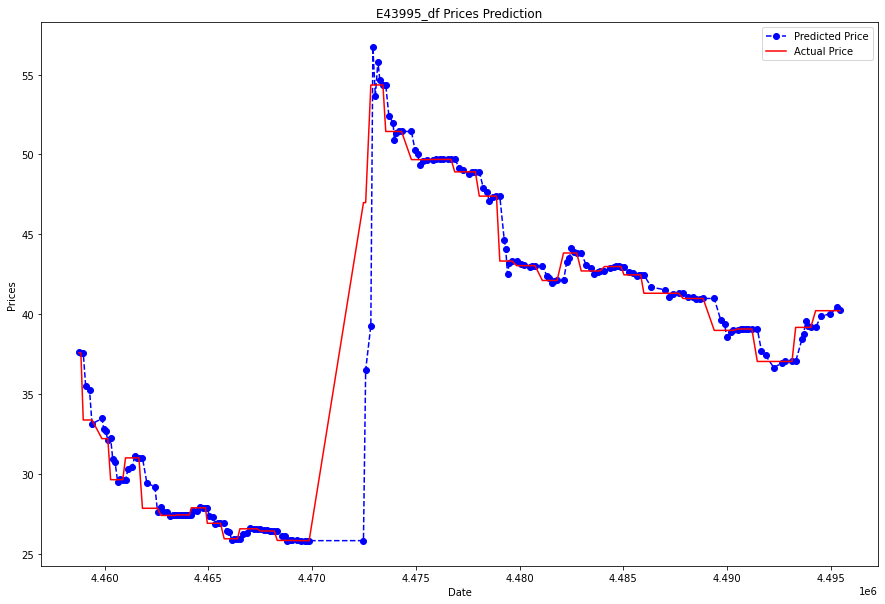

In [52]:
plt.figure(figsize=(15,10))
test_set_range = E43995_df[int(len(E43995_df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('E43995_df Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

We can see that we were able to acheive similarly successful results for two different NFTs.

However, both of the NFTs had high counts of resale transactions (600+). Next, we want to explore the effect of the ARIMA model on an NFT with fewer resale transations (50+).

In [53]:
#('Coins-steel', '24') has 64 transactions

Coin_df = mid_nft_df[mid_nft_df['Unique_id_collection'] == "('Coins-steel', '24')"]
Coin_df.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
4312060,0x49d784562e790179d3630dfa0faea9e59fee5b61,24,0x7c9cffbf1d2139100f7ed1869022f349f4b4fb85f956...,0x05c839adf9102ba94985074e3b508dbd5e1fccca,CoinsAndSteelOfficial,0xbf68eb95cf1280788c1ca6ffc3bd332a560575b5,NaN,https://storage.opensea.io/0x49d784562e790179d...,https://presale.coinsandsteel.com/static/facto...,https://storage.opensea.io/0x49d784562e790179d...,...,Nothing will be left unbroken under the weight...,Coins-steel,OpenSea,2018-12-30 00:00:00,2018-12-30 11:46:05,https://opensea.io/assets/0x49d784562e790179d3...,"('Coins-steel', '24')",Coinssteel,Other,4312060
4312076,0x49d784562e790179d3630dfa0faea9e59fee5b61,24,0xeb744c59e11d79ed2b3ba9c3b6d3a9507c215c07a750...,0x05c839adf9102ba94985074e3b508dbd5e1fccca,CoinsAndSteelOfficial,0x800ee823cb480c0d7395de477b7dc9299a8f2ba0,NaN,https://storage.opensea.io/0x49d784562e790179d...,https://presale.coinsandsteel.com/static/facto...,https://storage.opensea.io/0x49d784562e790179d...,...,Nothing will be left unbroken under the weight...,Coins-steel,OpenSea,2018-12-30 00:00:00,2018-12-30 11:04:13,https://opensea.io/assets/0x49d784562e790179d3...,"('Coins-steel', '24')",Coinssteel,Other,4312076
4312087,0x49d784562e790179d3630dfa0faea9e59fee5b61,24,0x09466430356f4fd5f3186aff9225f1104b59d6232daa...,0x05c839adf9102ba94985074e3b508dbd5e1fccca,CoinsAndSteelOfficial,0xb87dff97b62172c16a483f9fb7928a460e65ab23,NaN,https://storage.opensea.io/0x49d784562e790179d...,https://presale.coinsandsteel.com/static/facto...,https://storage.opensea.io/0x49d784562e790179d...,...,Nothing will be left unbroken under the weight...,Coins-steel,OpenSea,2018-12-30 00:00:00,2018-12-30 09:41:31,https://opensea.io/assets/0x49d784562e790179d3...,"('Coins-steel', '24')",Coinssteel,Other,4312087
4312203,0x49d784562e790179d3630dfa0faea9e59fee5b61,24,0x08cf43b3e5b50fedab4848971cf7f098f2edbbe1a3c4...,0x05c839adf9102ba94985074e3b508dbd5e1fccca,CoinsAndSteelOfficial,0xa1b0c9bf2654811df480e24df0cd779dd2e2f77b,NaN,https://storage.opensea.io/0x49d784562e790179d...,https://presale.coinsandsteel.com/static/facto...,https://storage.opensea.io/0x49d784562e790179d...,...,Nothing will be left unbroken under the weight...,Coins-steel,OpenSea,2018-12-30 00:00:00,2018-12-30 03:15:56,https://opensea.io/assets/0x49d784562e790179d3...,"('Coins-steel', '24')",Coinssteel,Other,4312203
4313252,0x49d784562e790179d3630dfa0faea9e59fee5b61,24,0x9c87c89b124295f0032ccce9067cafa9aa336838a0d7...,0x05c839adf9102ba94985074e3b508dbd5e1fccca,CoinsAndSteelOfficial,0x042e6c9703628d77b7d079ff9a664632b5b594d1,Ares23,https://storage.opensea.io/0x49d784562e790179d...,https://presale.coinsandsteel.com/static/facto...,https://storage.opensea.io/0x49d784562e790179d...,...,Nothing will be left unbroken under the weight...,Coins-steel,OpenSea,2018-12-28 00:00:00,2018-12-28 10:36:36,https://opensea.io/assets/0x49d784562e790179d3...,"('Coins-steel', '24')",Coinssteel,Other,4313252


In [54]:
Coin_df['Previous_Price_USD'] = Coin_df['Price_USD'].shift(1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_USD'>

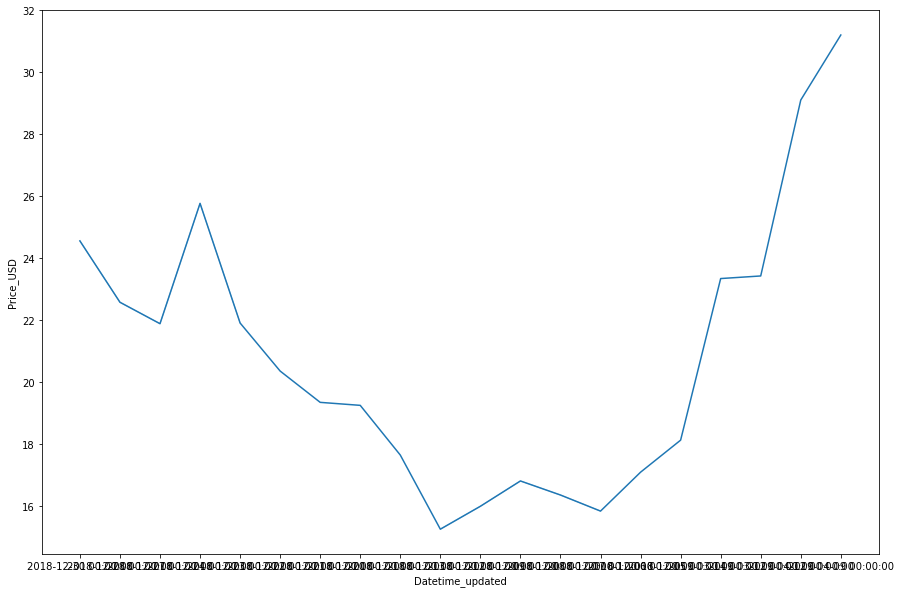

In [55]:
plt.figure(figsize=(15,10))
sns.lineplot(data=Coin_df, x="Datetime_updated", y="Price_USD")

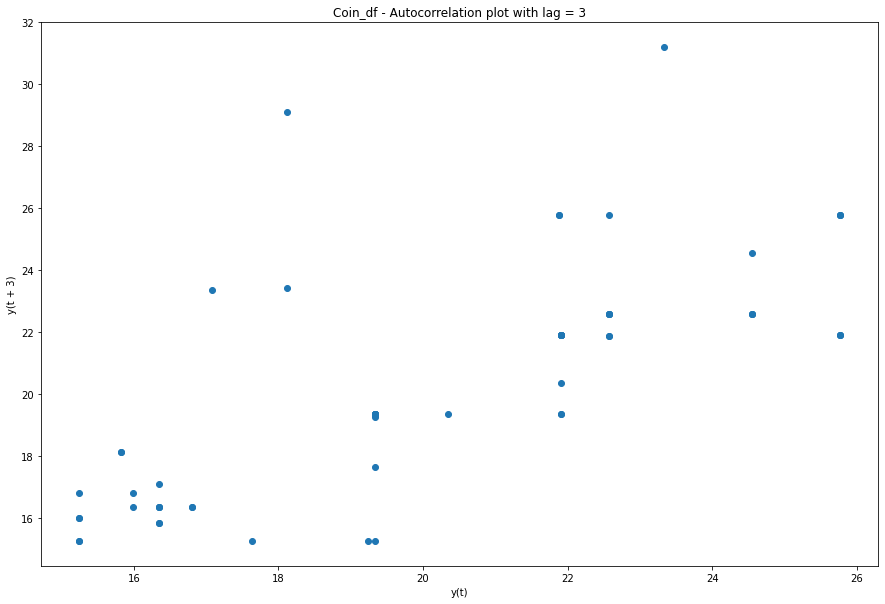

In [56]:
plt.figure(figsize=(15,10))
lag_plot(Coin_df['Price_USD'], lag=3)
plt.title('Coin_df - Autocorrelation plot with lag = 3')
plt.show()

From the auto-correlation plot, we can see that there is some auto-correlation in the data. Yet, there is not a strong relationship like we have seen previously. So, ARIMA could still be a good model for our data.

In [57]:
train_df, test_df = Coin_df[0:int(len(Coin_df)*0.7)], Coin_df[int(len(Coin_df)*0.7):]

training_data = train_df['Price_USD'].values
test_data = test_df['Price_USD'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
 
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 3.31612282786312


In [58]:
nft_name.append(('Coins-steel - 24'))  
nft_type.append('Individual')
trans_count.append(64)
mse_scores.append(MSE_error)

In [59]:
results_df = test_df.assign(Predicted_Price_USD = model_predictions) 
results_df['Pred_Price_Difference'] = results_df['Predicted_Price_USD']  - results_df['Previous_Price_USD']
results_df['Actual_Price_Difference'] = results_df['Price_USD']  - results_df['Previous_Price_USD']
results_df['Pred_Price_Change'] = np.where(results_df['Pred_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Actual_Price_Change'] = np.where(results_df['Actual_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Pred_Price_Change'].tail(1)

4437366    Positive
Name: Pred_Price_Change, dtype: object

In [60]:
acc_count = 0
# initialize counters
FP = 0.0 # false positives
FN = 0.0 # false negatives
TP = 0.0 # true positives
TN = 0.0 # true negatives

for index, row in results_df.iterrows():
    pred_change = row['Pred_Price_Change']
    actual_change = row['Actual_Price_Change']
    
    # 1 - positive case & 0 - negative case
    if actual_change == pred_change:
        #TP
        if pred_change == 'Positive':
            TP += 1
        #TN
        else:
            TN += 1
    else:
        #FP - actual = 1 & pred = 0
        if pred_change == 'Positive':
            FP += 1      
        #FN - actual = 0 & pred = 1
        else:
            FN += 1
    
    if pred_change == actual_change:
        acc_count += 1

#accuracy = acc_count/len(results_df)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)
denom = 0.5 * (FP + FN)
FScore = TP / (TP + denom) 

binary_acc.append(accuracy)
binary_prec.append(precision)
binary_recall.append(recall)
binary_f1score.append(FScore)
print("Accuracy: ", accuracy)

Accuracy:  0.7


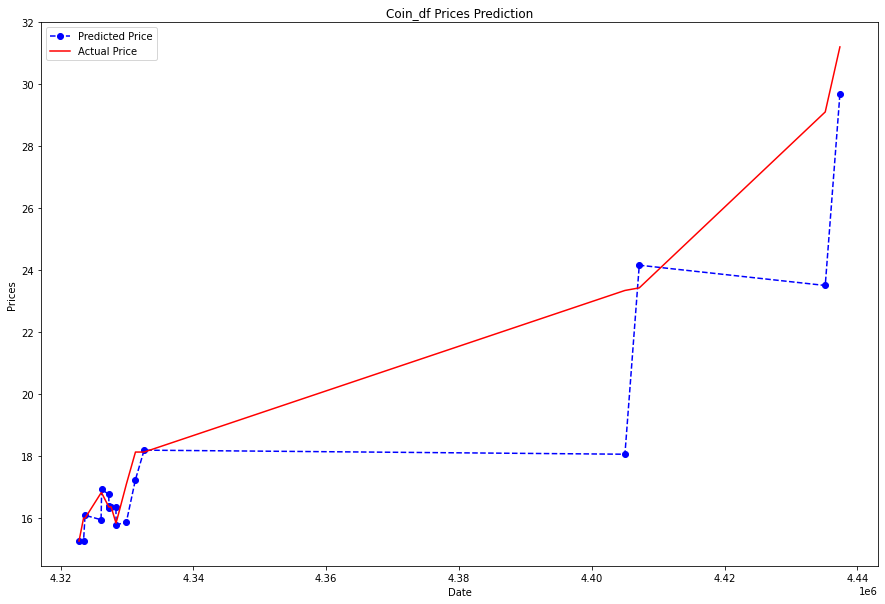

In [61]:
plt.figure(figsize=(15,10))
test_set_range = Coin_df[int(len(Coin_df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Coin_df Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [62]:
#('Cryptobots', '7818') has 21 transactions

bots_df = low_nft_df[low_nft_df['Unique_id_collection'] == "('Cryptobots', '7818')"]
bots_df.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
4222147,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,7818,0xe7ceafdf8ef0b37edda1114cc19b48fd96ce1ac66d66...,0x64e9e725e21db1a52803321656c164c7628c28a2,NaN,0xdf132b09bfda6c3d6c348cac95fb1f2000c21761,NaN,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-05-09 00:00:00,2018-05-09 06:54:53,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '7818')",Cryptobot,Games,4222147
4222160,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,7818,0x37923615735ea310ba32605bc0c25929d6a9e3e3ee5c...,0x600c532f1dd236fc31bf4025fc6596581b5101a5,NaN,0x64e9e725e21db1a52803321656c164c7628c28a2,NaN,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-05-09 00:00:00,2018-05-09 06:17:10,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '7818')",Cryptobot,Games,4222160
4222173,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,7818,0x4670caceb2fe6f02f5ccfb13b533ac25a6aa70cd9736...,0xcc4b4257469ad7255c8dd690fcfec4384d9022a3,NaN,0x600c532f1dd236fc31bf4025fc6596581b5101a5,NaN,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-05-09 00:00:00,2018-05-09 05:47:40,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '7818')",Cryptobot,Games,4222173
4222178,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,7818,0x688f8eb7d87ef02f67ef61f3556ab353212a2a7ba1d5...,0x4d9e8be4f8a736e241df9263039486d34052cec1,NaN,0xcc4b4257469ad7255c8dd690fcfec4384d9022a3,NaN,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-05-09 00:00:00,2018-05-09 05:32:58,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '7818')",Cryptobot,Games,4222178
4222402,0xf7a6e15dfd5cdd9ef12711bd757a9b6021abf643,7818,0x851a28f6f04c1e8e291d97fc493212b921f91d343aff...,0x784d2ae5fada9bc2fc53fbdd596bf336d31b3c17,NaN,0x4d9e8be4f8a736e241df9263039486d34052cec1,NaN,NaN,NaN,NaN,...,NaN,Cryptobots,OpenSea,2018-05-08 00:00:00,2018-05-08 19:47:31,https://opensea.io/assets/0xf7a6e15dfd5cdd9ef1...,"('Cryptobots', '7818')",Cryptobot,Games,4222402


In [63]:
bots_df['Previous_Price_USD'] = bots_df['Price_USD'].shift(1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_USD'>

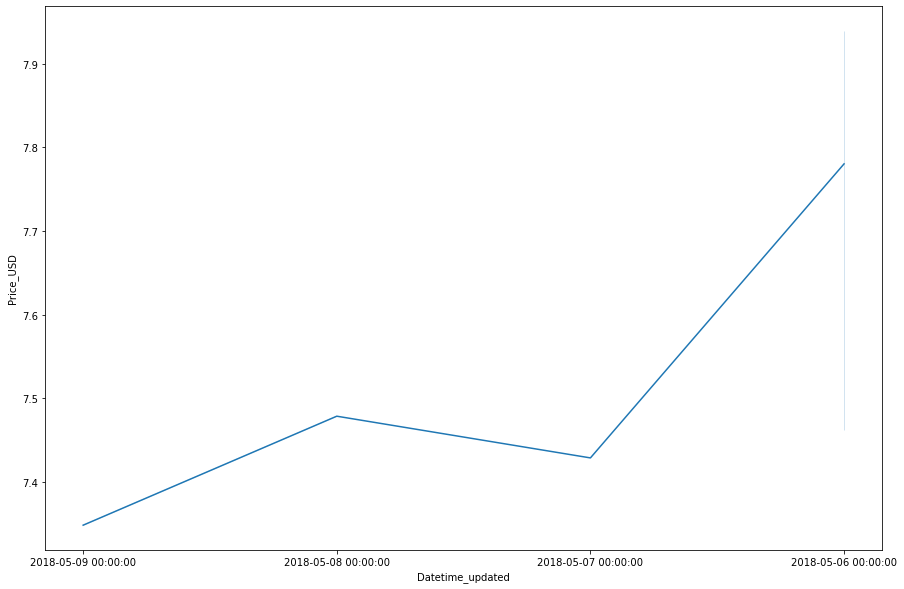

In [64]:
plt.figure(figsize=(15,10))
sns.lineplot(data=bots_df, x="Datetime_updated", y="Price_USD")

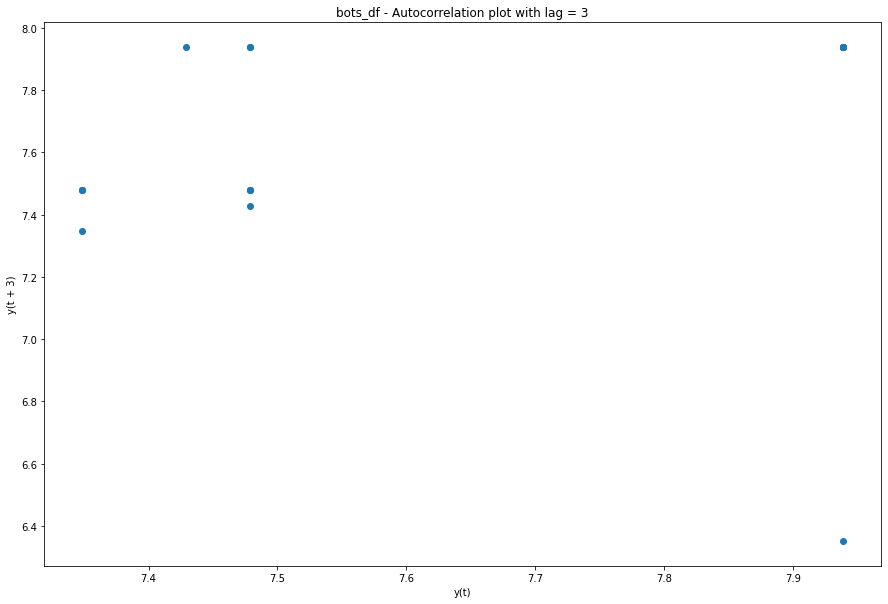

In [65]:
plt.figure(figsize=(15,10))
lag_plot(bots_df['Price_USD'], lag=3)
plt.title('bots_df - Autocorrelation plot with lag = 3')
plt.show()

In [66]:
train_df, test_df = bots_df[0:int(len(bots_df)*0.7)], bots_df[int(len(bots_df)*0.7):]

training_data = train_df['Price_USD'].values
test_data = test_df['Price_USD'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
 
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.36016319591114526


In [67]:
nft_name.append(('Cryptobots - 7818'))  
nft_type.append('Individual')
trans_count.append(21)
mse_scores.append(MSE_error)

In [68]:
results_df = test_df.assign(Predicted_Price_USD = model_predictions) 
results_df['Pred_Price_Difference'] = results_df['Predicted_Price_USD']  - results_df['Previous_Price_USD']
results_df['Actual_Price_Difference'] = results_df['Price_USD']  - results_df['Previous_Price_USD']
results_df['Pred_Price_Change'] = np.where(results_df['Pred_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Actual_Price_Change'] = np.where(results_df['Actual_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Pred_Price_Change'].tail(1)

4223559    Positive
Name: Pred_Price_Change, dtype: object

In [69]:
acc_count = 0
# initialize counters
FP = 0.0 # false positives
FN = 0.0 # false negatives
TP = 0.0 # true positives
TN = 0.0 # true negatives

for index, row in results_df.iterrows():
    pred_change = row['Pred_Price_Change']
    actual_change = row['Actual_Price_Change']
    
    # 1 - positive case & 0 - negative case
    if actual_change == pred_change:
        #TP
        if pred_change == 'Positive':
            TP += 1
        #TN
        else:
            TN += 1
    else:
        #FP - actual = 1 & pred = 0
        if pred_change == 'Positive':
            FP += 1      
        #FN - actual = 0 & pred = 1
        else:
            FN += 1
    
    if pred_change == actual_change:
        acc_count += 1

#accuracy = acc_count/len(results_df)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)
denom = 0.5 * (FP + FN)
FScore = TP / (TP + denom) 

binary_acc.append(accuracy)
binary_prec.append(precision)
binary_recall.append(recall)
binary_f1score.append(FScore)
print("Accuracy: ", accuracy)

Accuracy:  0.5714285714285714


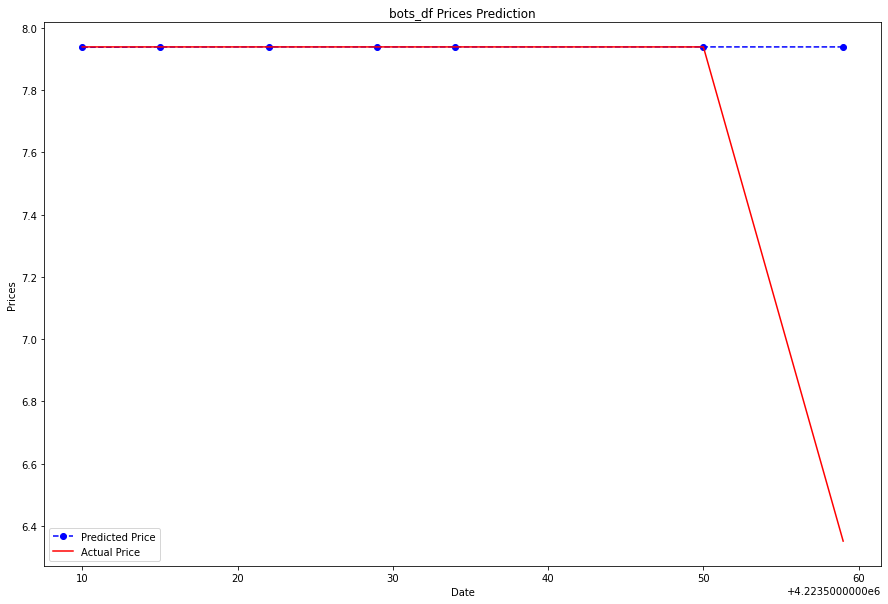

In [70]:
plt.figure(figsize=(15,10))
test_set_range = bots_df[int(len(bots_df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('bots_df Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

From our test predictions plot, we can observe that lower transaction counts lead to less accurate results for the ARIMA model. 

### ARIMA Model for Collections

Now that we have performed predictions for single NFTs, we want to explore the impact of grouping NFTs together. 

This is because a single NFT performs quite well with the ARIMA model if it has a lot of data with regards to resale transactions. However the ARIMA model does not perform quite as well for NFTs that have fewer data points. As many NFTs have very little transaction data, we need a way to group the NFTs in order to utilize similar NFT price history in our model. So, we will group our NFTs by collection, using a daily USD price average.

In [71]:
df["Collection_cleaned"].unique()

array(['Godsunchained', 'Cryptokittie', 'Oghodlergang', ...,
       'Conniedigital', 'Cryptoser', nan], dtype=object)

In [72]:
len(df["Collection_cleaned"].unique())

2051

In [73]:
# group nfts collection transactions
summary_data_col = df.groupby('Collection_cleaned').count()
summary_data_col[['index']]

,index
Collection_cleaned,
Abrehmiii,9
Abstract,51
Abstrametric,6
Absurd,11
Acebgznft,203
...,...
Zlfhomedecor,14
Zodiac,16
Zombie,1285


In [74]:
rep_nft_col = summary_data_col[summary_data_col['index'] > 20000]
rep_nft_col.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Category,index
Collection_cleaned,,,,,,,,,,,,,,,,,,,,,
Alien,1290137,1290137,0,1290137,0,1290137,0,1289958,1289958,1289958,...,0,0,1290137,1290137,1290137,1290137,0,1290137,1290137,1290137
Atari,26491,26491,0,26491,0,26491,0,26491,26491,26491,...,0,0,26491,26491,26491,26491,0,26491,26491,26491
Bitcoin,26129,26129,0,26129,0,26129,0,26122,26122,26122,...,0,0,26129,26129,26129,26129,0,26129,26129,26129
Bitverse,25019,25019,0,25019,0,25019,0,20365,20365,20365,...,0,0,25019,25019,25019,25019,0,25019,25019,25019
Cartombs.r,64986,64986,0,64986,0,64986,0,64986,64986,64986,...,0,0,64986,64986,64986,64986,0,64986,64986,64986


In [75]:
# 2 nft collections have over 20,000 resale transactions 
len(rep_nft_col)

22

In [76]:
nft_list_col = rep_nft_col.index.to_list()
# subset main df to nfts with high resale transaction counts
nft_col_df = df[df['Collection_cleaned'].isin(nft_list_col)]
nft_col_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games,0
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games,1
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games,2
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games,3
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games,4
5,NaN,43107083.0,0x986ecc59dc28e84ad987a52e4a4fdade67d1fbb5f81b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=116&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '43107083.0')",Godsunchained,Games,5
6,NaN,7713824.0,0x72c1bfec2a020b5cb55ee3fc2f8ae1e66568ec881f62...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=190&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '7713824.0')",Godsunchained,Games,6
7,NaN,45951791.0,0x34baab28115bdadbcbc50846220060bb8e516f754c3b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=173&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '45951791.0')",Godsunchained,Games,7
8,NaN,5400581.0,0xf52ba58317f3ab62fb43da3e9d417fe4fa88bff86d9c...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c5968ee5ce21ad7324c97014fcb99f87f7fec6f,NaN,https://card.godsunchained.com/?id=27&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:28,NaN,"('Godsunchained', '5400581.0')",Godsunchained,Games,8
9,NaN,117891743.0,0xb70b159f02200125a258726694299931a8c69651053d...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:57:50,NaN,"('Godsunchained', '117891743.0')",Godsunchained,Games,9


In [77]:
len(nft_col_df)

4007076

In [78]:
sum_col_data_new = nft_col_df.groupby('Collection_cleaned').count()
sum_col_data_new[['index']]

,index
Collection_cleaned,
Alien,1290137
Atari,26491
Bitcoin,26129
Bitverse,25019
Cartombs.r,64986
Cryptokittie,954008
Dark,27013
Decentraland,20186
Gdz.topp,31722


<AxesSubplot:xlabel='index', ylabel='Count'>

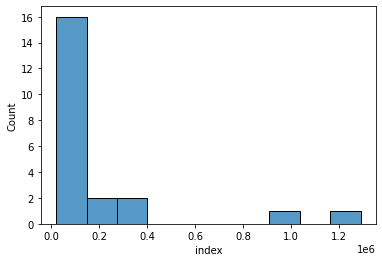

In [79]:
sns.histplot(data=sum_col_data_new, x='index', bins = 10)

#### Cryptokitties Collection

In [80]:
# Cryptokittie has 954008 sale transactions
kitties = df[df['Collection_cleaned'] == "Cryptokittie"]
kitties.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
236210,NaN,19925.0,0xd907c6bb81c6e1d58edd7484ae0f3a66eb17ae969737...,0x214e0807b739259e432c6d6842fb6c4bc8eae4da,NaN,0x71494a98803ad0bc7b228a14da82f7197665a065,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:59:41,NaN,"('Cryptokitties', '19925')",Cryptokittie,Art,236210
236211,NaN,19737.0,0x27f16dd55a1aa64248cbd7c48425540bdf7c08afa680...,0x7058cc88746c4d3d3c8df3e364717771ce90ece8,NaN,0x702161763b21e21256c2ec8a79cb581ea39c0af3,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:39,NaN,"('Cryptokitties', '19737')",Cryptokittie,Art,236211
236212,NaN,14206.0,0xc1069a14342ca3c2a940a328e6a90d3e8441c89c7a70...,0x7058cc88746c4d3d3c8df3e364717771ce90ece8,NaN,0xb5cdd02824a1f715cbfb0c26192f811ae3bf4d61,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:07,NaN,"('Cryptokitties', '14206')",Cryptokittie,Art,236212
236213,NaN,6948.0,0x34e41ad7b791143752feb9e42d62ff07cb943a9ff855...,0x79bd592415ff6c91cfe69a7f9cd091354fc65a18,NaN,0xcfb586d08633fc36953be8083b63a7d96d50265b,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:01,NaN,"('Cryptokitties', '6948')",Cryptokittie,Art,236213
236214,NaN,19128.0,0x4f91023b44d99d552bd02b55e16f3eec2d6a4cdfd6f5...,0xf50077dc0a58d5d1cf12c0c900b1365ecaccff24,NaN,0x1625ff3aa126dd7ca468ab9195519e26a9cee53c,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,Cryptokitties,Cryptokitties,2017-11-30 00:00:00,2017-11-30 23:57:01,NaN,"('Cryptokitties', '19128')",Cryptokittie,Art,236214


<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_USD'>

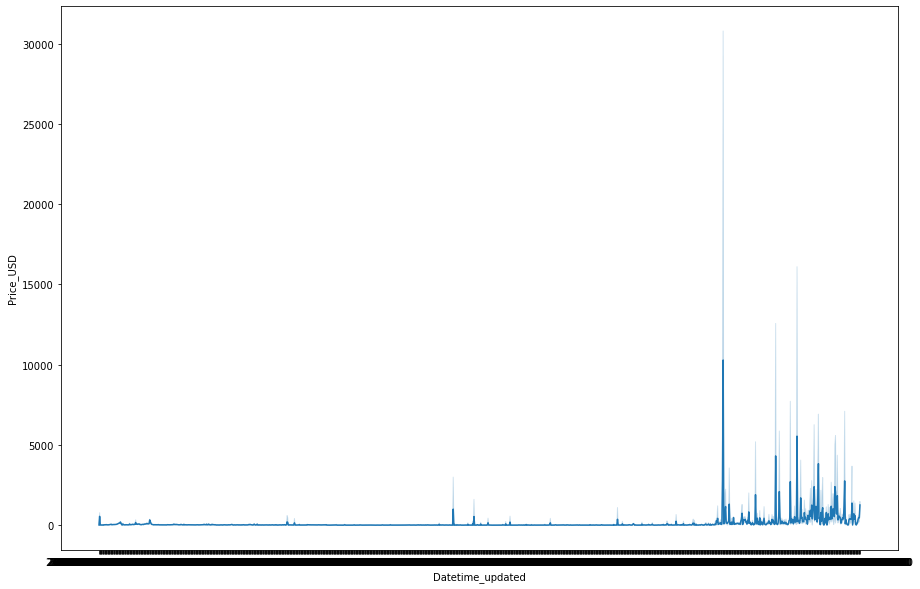

In [81]:
plt.figure(figsize=(15,10))
sns.lineplot(data=kitties, x="Datetime_updated", y="Price_USD")

In [82]:
sum_kitties = kitties.groupby(pd.Grouper(key='Datetime_updated', axis=0)).mean()
sum_kitties[['Price_USD']]

,Price_USD
Datetime_updated,
2017-11-30 00:00:00,13.279197
2017-11-29 00:00:00,549.976007
2017-11-28 00:00:00,15.237672
2017-11-27 00:00:00,10.028943
2017-11-26 00:00:00,10.671264
...,...
2021-04-05 00:00:00,141.825703
2021-04-04 00:00:00,362.371287
2021-04-03 00:00:00,471.230769


In [83]:
sum_kitties['Previous_Price_USD'] = sum_kitties['Price_USD'].shift(1)
sum_kitties.head()

,Price_Crypto,Price_USD,index,Previous_Price_USD
Datetime_updated,,,,
2017-11-30 00:00:00,0.028904,13.279197,237593.0,NaN
2017-11-29 00:00:00,1.189616,549.976007,239676.0,13.279197
2017-11-28 00:00:00,0.033139,15.237672,240740.5,549.976007
2017-11-27 00:00:00,0.021807,10.028943,241188.0,15.237672
2017-11-26 00:00:00,0.021829,10.671264,241342.0,10.028943


<AxesSubplot:xlabel='Price_USD', ylabel='Count'>

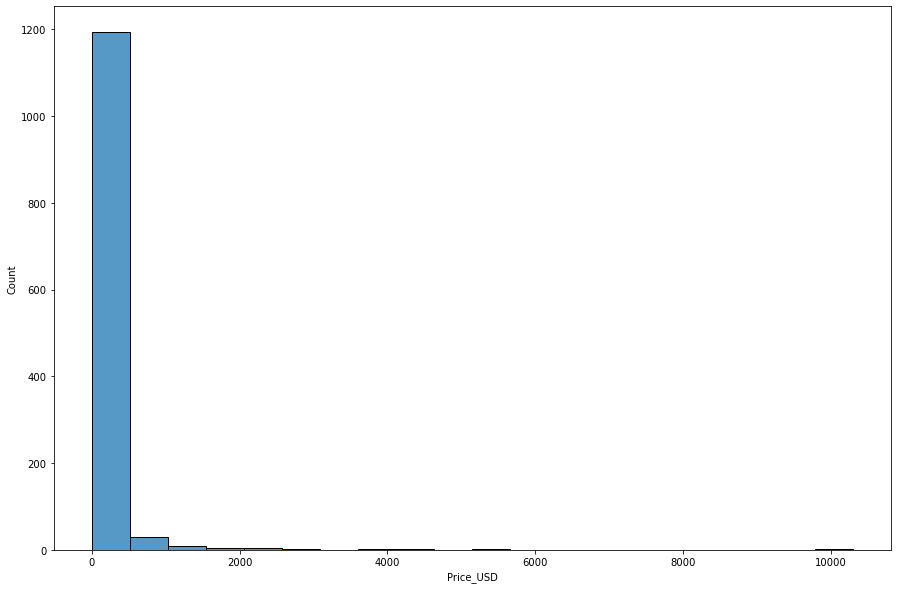

In [84]:
plt.figure(figsize=(15,10))
sns.histplot(data=sum_kitties, x='Price_USD', bins = 20)

<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_USD'>

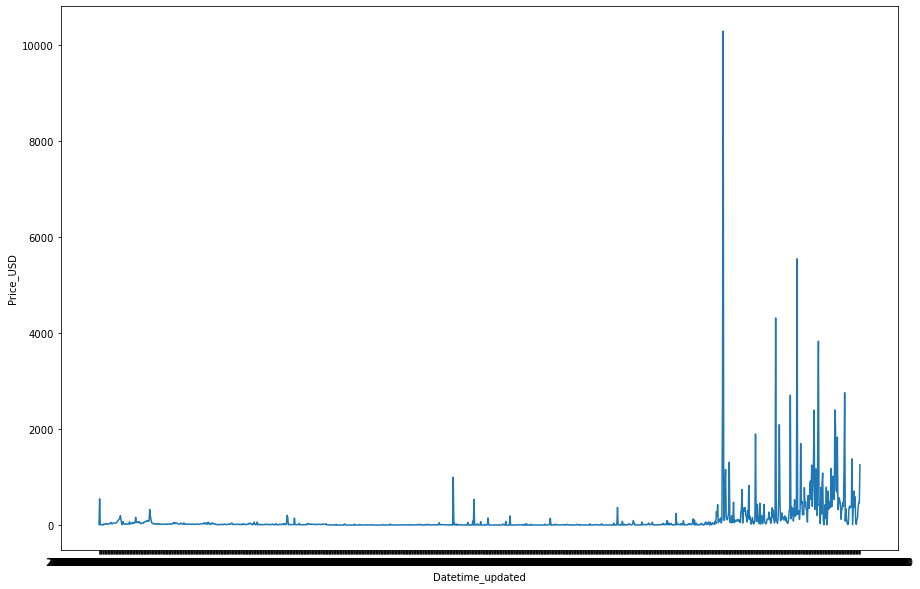

In [85]:
plt.figure(figsize=(15,10))
sns.lineplot(data=sum_kitties, x="Datetime_updated", y="Price_USD")

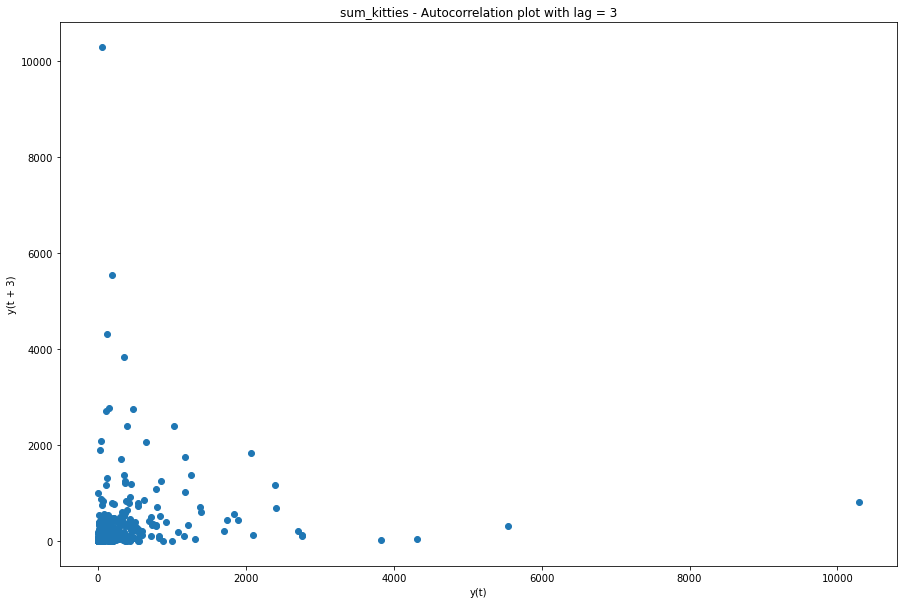

In [86]:
plt.figure(figsize=(15,10))
lag_plot(sum_kitties['Price_USD'], lag=3)
plt.title('sum_kitties - Autocorrelation plot with lag = 3')
plt.show()

From the auto-correlation plot, we can see that there is slight correlation in the data. However, the data is still spread in a way that indicates that the ARIMA model may not perform as well for extreme values.

In [87]:
train_df, test_df = sum_kitties[0:int(len(sum_kitties)*0.7)], sum_kitties[int(len(sum_kitties)*0.7):]

training_data = train_df['Price_USD'].values
test_data = test_df['Price_USD'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
 
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Testing Mean Squared Error is 1044218.7579085247


In [88]:
nft_name.append(('Cryptokittie'))  
nft_type.append('Collection')
trans_count.append(954008)
mse_scores.append(MSE_error)

In [89]:
results_df = test_df.assign(Predicted_Price_USD = model_predictions) 
results_df['Pred_Price_Difference'] = results_df['Predicted_Price_USD']  - results_df['Previous_Price_USD']
results_df['Actual_Price_Difference'] = results_df['Price_USD']  - results_df['Previous_Price_USD']
results_df['Pred_Price_Change'] = np.where(results_df['Pred_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Actual_Price_Change'] = np.where(results_df['Actual_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Pred_Price_Change'].tail(1)

Datetime_updated
2021-04-01 00:00:00    Negative
Name: Pred_Price_Change, dtype: object

In [90]:
acc_count = 0
# initialize counters
FP = 0.0 # false positives
FN = 0.0 # false negatives
TP = 0.0 # true positives
TN = 0.0 # true negatives

for index, row in results_df.iterrows():
    pred_change = row['Pred_Price_Change']
    actual_change = row['Actual_Price_Change']
    
    # 1 - positive case & 0 - negative case
    if actual_change == pred_change:
        #TP
        if pred_change == 'Positive':
            TP += 1
        #TN
        else:
            TN += 1
    else:
        #FP - actual = 1 & pred = 0
        if pred_change == 'Positive':
            FP += 1      
        #FN - actual = 0 & pred = 1
        else:
            FN += 1
    
    if pred_change == actual_change:
        acc_count += 1

#accuracy = acc_count/len(results_df)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)
denom = 0.5 * (FP + FN)
FScore = TP / (TP + denom) 

binary_acc.append(accuracy)
binary_prec.append(precision)
binary_recall.append(recall)
binary_f1score.append(FScore)
print("Accuracy: ", accuracy)

Accuracy:  0.6613333333333333


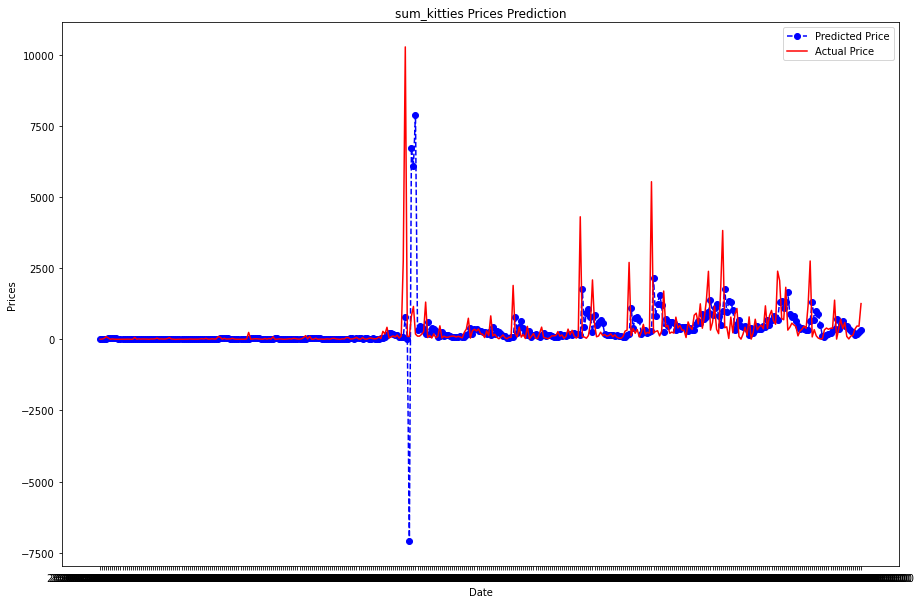

In [91]:
plt.figure(figsize=(15,10))
test_set_range = sum_kitties[int(len(sum_kitties)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('sum_kitties Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

The model appears to have predicted a data point in the extreme opposite direction based on the trend data. We will perform the same model on a different NFT collection in order to see if this is a result of our data transaformation or an anomoly.

#### Godsunchained Collection

In [92]:
# Godsunchained has 236399 sale transactions
Godsunchained = df[df['Collection_cleaned'] == "Godsunchained"]
Godsunchained.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games,0
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games,1
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games,2
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games,3
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games,4


In [93]:
len(Godsunchained)

236399

<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_USD'>

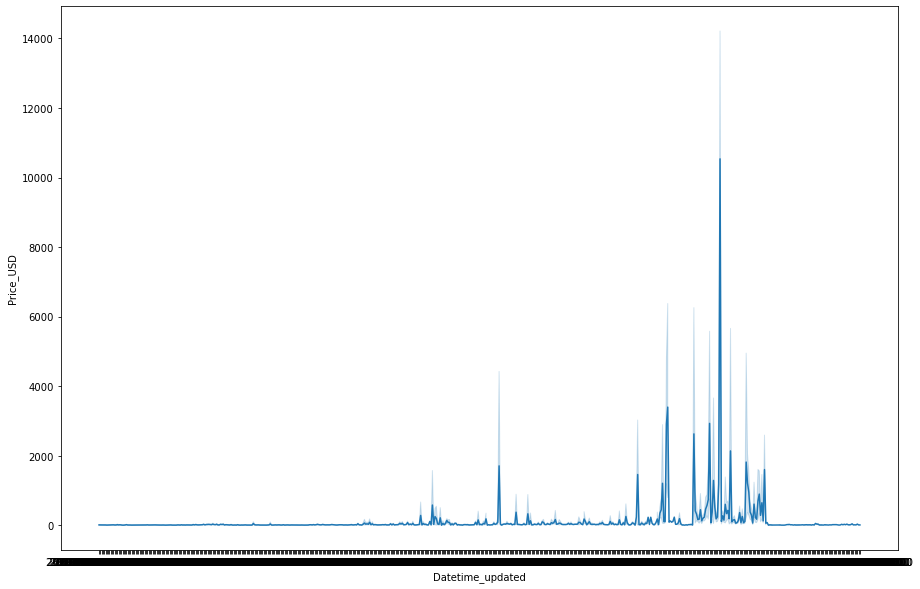

In [94]:
plt.figure(figsize=(15,10))
sns.lineplot(data=Godsunchained, x="Datetime_updated", y="Price_USD")

In [95]:
sum_gds = Godsunchained.groupby(pd.Grouper(key='Datetime_updated', axis=0)).mean()
sum_gds[['Price_USD']]

,Price_USD
Datetime_updated,
2019-11-30 00:00:00,8.071726
2019-11-29 00:00:00,6.272932
2019-11-28 00:00:00,6.562180
2019-11-27 00:00:00,6.588826
2019-11-26 00:00:00,4.957958
...,...
2019-05-06 00:00:00,10.863112
2019-06-22 00:00:00,7.689875
2019-06-17 00:00:00,30.872240


In [96]:
sum_gds['Previous_Price_USD'] = sum_gds['Price_USD'].shift(1)
sum_gds.head()

,Price_Crypto,Price_USD,index,Previous_Price_USD
Datetime_updated,,,,
2019-11-30 00:00:00,0.053247,8.071726,2754.0,NaN
2019-11-29 00:00:00,0.039979,6.272932,8631.0,8.071726
2019-11-28 00:00:00,0.043468,6.562180,14320.0,6.272932
2019-11-27 00:00:00,0.042623,6.588826,19230.5,6.562180
2019-11-26 00:00:00,0.033600,4.957958,23886.5,6.588826


<AxesSubplot:xlabel='Price_USD', ylabel='Count'>

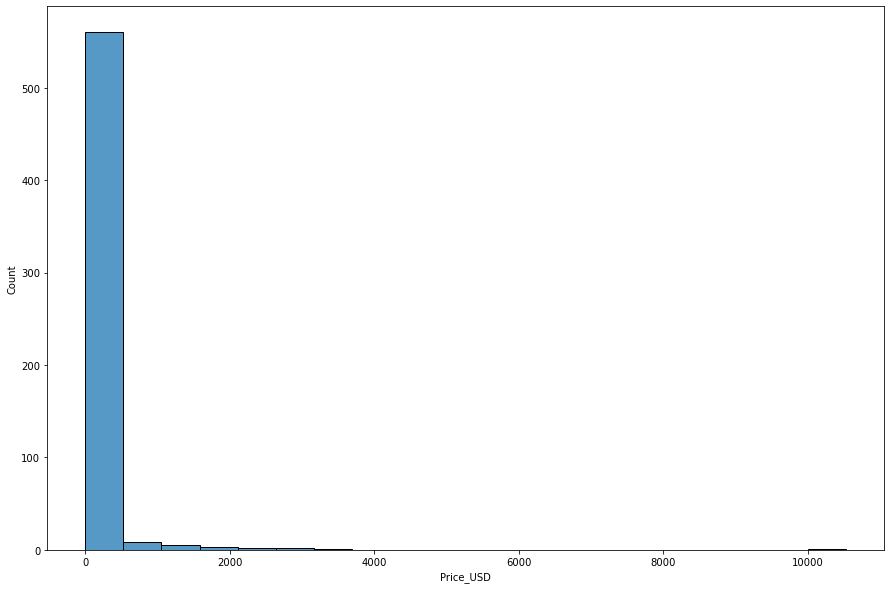

In [97]:
plt.figure(figsize=(15,10))
sns.histplot(data=sum_gds, x='Price_USD', bins = 20)

<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_USD'>

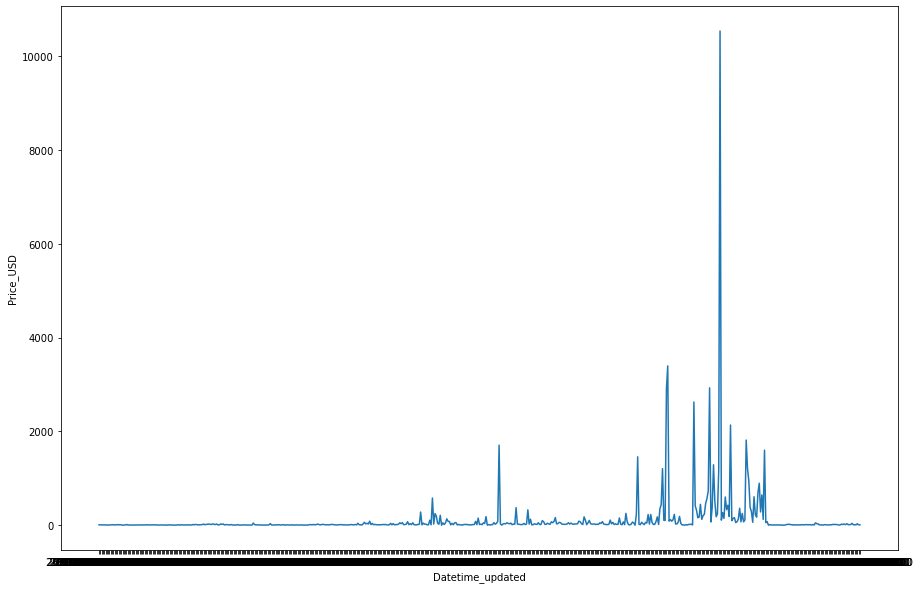

In [98]:
plt.figure(figsize=(15,10))
sns.lineplot(data=sum_gds, x="Datetime_updated", y="Price_USD")

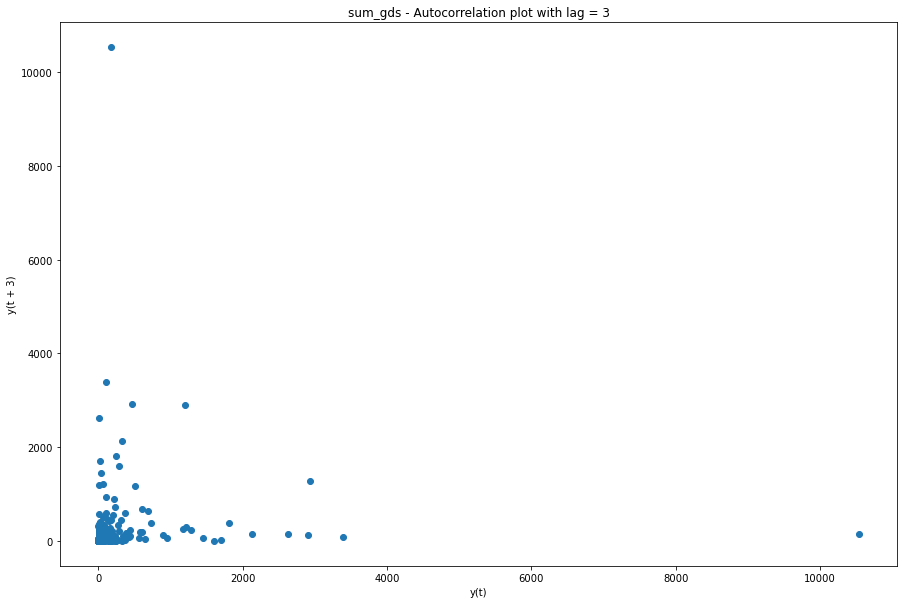

In [99]:
plt.figure(figsize=(15,10))
lag_plot(sum_gds['Price_USD'], lag=3)
plt.title('sum_gds - Autocorrelation plot with lag = 3')
plt.show()

In [100]:
train_df, test_df = sum_gds[0:int(len(sum_gds)*0.7)], sum_gds[int(len(sum_gds)*0.7):]

training_data = train_df['Price_USD'].values
test_data = test_df['Price_USD'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
 
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1379517.860869704


In [101]:
nft_name.append(('Godsunchained'))  
nft_type.append('Collection')
trans_count.append(236299)
mse_scores.append(MSE_error)

In [102]:
results_df = test_df.assign(Predicted_Price_USD = model_predictions) 
results_df['Pred_Price_Difference'] = results_df['Predicted_Price_USD']  - results_df['Previous_Price_USD']
results_df['Actual_Price_Difference'] = results_df['Price_USD']  - results_df['Previous_Price_USD']
results_df['Pred_Price_Change'] = np.where(results_df['Pred_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Actual_Price_Change'] = np.where(results_df['Actual_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Pred_Price_Change'].tail(1)

Datetime_updated
2019-06-09 00:00:00    Positive
Name: Pred_Price_Change, dtype: object

In [103]:
acc_count = 0
# initialize counters
FP = 0.0 # false positives
FN = 0.0 # false negatives
TP = 0.0 # true positives
TN = 0.0 # true negatives

for index, row in results_df.iterrows():
    pred_change = row['Pred_Price_Change']
    actual_change = row['Actual_Price_Change']
    
    # 1 - positive case & 0 - negative case
    if actual_change == pred_change:
        #TP
        if pred_change == 'Positive':
            TP += 1
        #TN
        else:
            TN += 1
    else:
        #FP - actual = 1 & pred = 0
        if pred_change == 'Positive':
            FP += 1      
        #FN - actual = 0 & pred = 1
        else:
            FN += 1
    
    if pred_change == actual_change:
        acc_count += 1

#accuracy = acc_count/len(results_df)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)
denom = 0.5 * (FP + FN)
FScore = TP / (TP + denom) 

binary_acc.append(accuracy)
binary_prec.append(precision)
binary_recall.append(recall)
binary_f1score.append(FScore)
print("Accuracy: ", accuracy)

Accuracy:  0.68


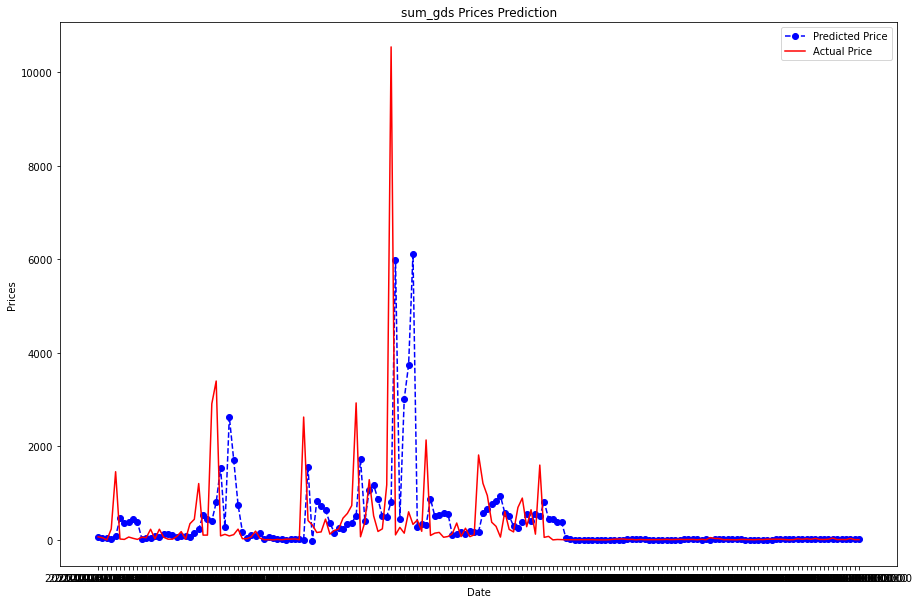

In [104]:
plt.figure(figsize=(15,10))
test_set_range = sum_gds[int(len(sum_gds)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('sum_gds Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

The model performs better than the previous collection, with no major outlying predictions. In general the model seems to perform well given then average collection data. However, the model seems to miss major price peaks which is important for our overall goal.

Because so much of the early data was quite flat (the NFT market was not a popular at that time), we will retrain the same model on a shorter, more recent period of time and compare the results.

#### Godsunchained - 2020/2021

In [105]:
df['Date'] = pd.to_datetime(df['Datetime_updated'])

In [106]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [107]:
df['Year'] = np.nan_to_num(df['Year']).astype(int)
df['Month'] = np.nan_to_num(df['Month']).astype(int)

In [108]:
df.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,Date,Year,Month
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games,0,2019-11-30,2019,11
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games,1,2019-11-30,2019,11
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games,2,2019-11-30,2019,11
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games,3,2019-11-30,2019,11
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games,4,2019-11-30,2019,11


In [109]:
df2020 = df[df['Year'] >= 2020]
df2020.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,Date,Year,Month
130601,NaN,111864485.0,0x2f5426b3fc18bf4834249899c18ebba285cc5bbcc378...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,NaN,0xa0a0eaa4760d99f9173003185d0efa5bed675e78,NaN,https://card.godsunchained.com/?id=101&q=3,NaN,NaN,...,2020-01-31 00:00:00,2020-01-31 23:49:59,NaN,"('Godsunchained', '111864485.0')",Godsunchained,Games,130601,2020-01-31,2020,1
130602,NaN,124368257.0,0xba10c5fb66aa2ed96b3c71ad9f2962f5d2308882b492...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,NaN,0xa0a0eaa4760d99f9173003185d0efa5bed675e78,NaN,https://card.godsunchained.com/?id=102&q=3,NaN,NaN,...,2020-01-31 00:00:00,2020-01-31 23:48:49,NaN,"('Godsunchained', '124368257.0')",Godsunchained,Games,130602,2020-01-31,2020,1
130603,NaN,8389284.0,0x0866d1624a3bc33fd697f1c55e33b970fe3407cb08de...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,NaN,0xa0a0eaa4760d99f9173003185d0efa5bed675e78,NaN,https://card.godsunchained.com/?id=209&q=4,NaN,NaN,...,2020-01-31 00:00:00,2020-01-31 23:47:22,NaN,"('Godsunchained', '8389284.0')",Godsunchained,Games,130603,2020-01-31,2020,1
130604,NaN,99946150.0,0xca3bb9f78060a1ff474777bf3309cc5d5d179143ef9c...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,NaN,0xa0a0eaa4760d99f9173003185d0efa5bed675e78,NaN,https://card.godsunchained.com/?id=269&q=4,NaN,NaN,...,2020-01-31 00:00:00,2020-01-31 23:45:43,NaN,"('Godsunchained', '99946150.0')",Godsunchained,Games,130604,2020-01-31,2020,1
130605,NaN,17163902.0,0x3452a2d3839121d9e483a531e3fd135b2ea31c4f24d4...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,NaN,0xa0a0eaa4760d99f9173003185d0efa5bed675e78,NaN,https://card.godsunchained.com/?id=269&q=4,NaN,NaN,...,2020-01-31 00:00:00,2020-01-31 23:44:57,NaN,"('Godsunchained', '17163902.0')",Godsunchained,Games,130605,2020-01-31,2020,1


In [110]:
df2020['Year'].unique()

array([2020, 2021])

In [111]:
Godsunchained = df2020[df2020['Collection_cleaned'] == "Godsunchained"]
Godsunchained.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,Date,Year,Month
130601,NaN,111864485.0,0x2f5426b3fc18bf4834249899c18ebba285cc5bbcc378...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,NaN,0xa0a0eaa4760d99f9173003185d0efa5bed675e78,NaN,https://card.godsunchained.com/?id=101&q=3,NaN,NaN,...,2020-01-31 00:00:00,2020-01-31 23:49:59,NaN,"('Godsunchained', '111864485.0')",Godsunchained,Games,130601,2020-01-31,2020,1
130602,NaN,124368257.0,0xba10c5fb66aa2ed96b3c71ad9f2962f5d2308882b492...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,NaN,0xa0a0eaa4760d99f9173003185d0efa5bed675e78,NaN,https://card.godsunchained.com/?id=102&q=3,NaN,NaN,...,2020-01-31 00:00:00,2020-01-31 23:48:49,NaN,"('Godsunchained', '124368257.0')",Godsunchained,Games,130602,2020-01-31,2020,1
130603,NaN,8389284.0,0x0866d1624a3bc33fd697f1c55e33b970fe3407cb08de...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,NaN,0xa0a0eaa4760d99f9173003185d0efa5bed675e78,NaN,https://card.godsunchained.com/?id=209&q=4,NaN,NaN,...,2020-01-31 00:00:00,2020-01-31 23:47:22,NaN,"('Godsunchained', '8389284.0')",Godsunchained,Games,130603,2020-01-31,2020,1
130604,NaN,99946150.0,0xca3bb9f78060a1ff474777bf3309cc5d5d179143ef9c...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,NaN,0xa0a0eaa4760d99f9173003185d0efa5bed675e78,NaN,https://card.godsunchained.com/?id=269&q=4,NaN,NaN,...,2020-01-31 00:00:00,2020-01-31 23:45:43,NaN,"('Godsunchained', '99946150.0')",Godsunchained,Games,130604,2020-01-31,2020,1
130605,NaN,17163902.0,0x3452a2d3839121d9e483a531e3fd135b2ea31c4f24d4...,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,NaN,0xa0a0eaa4760d99f9173003185d0efa5bed675e78,NaN,https://card.godsunchained.com/?id=269&q=4,NaN,NaN,...,2020-01-31 00:00:00,2020-01-31 23:44:57,NaN,"('Godsunchained', '17163902.0')",Godsunchained,Games,130605,2020-01-31,2020,1


<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_USD'>

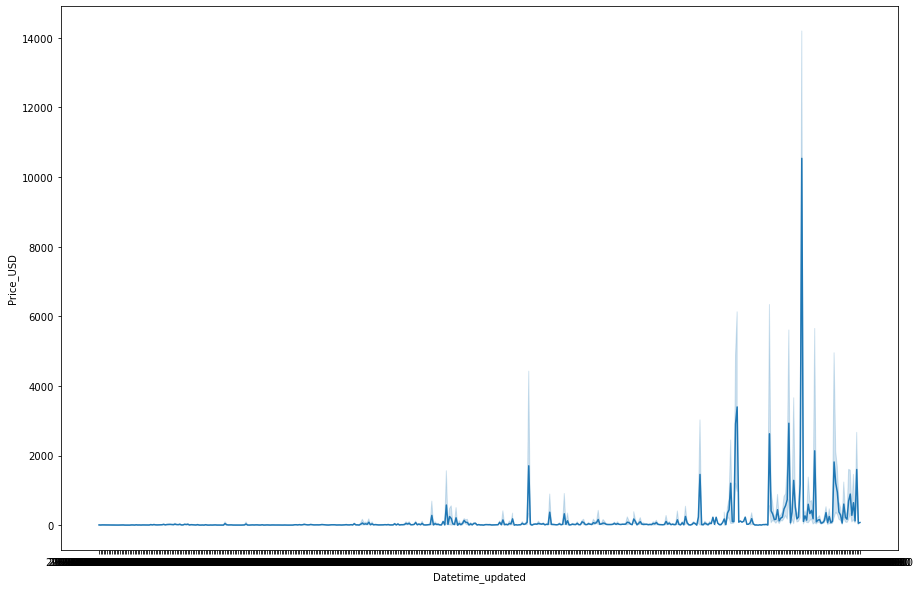

In [112]:
plt.figure(figsize=(15,10))
sns.lineplot(data=Godsunchained, x="Datetime_updated", y="Price_USD")

In [113]:
sum_gds = Godsunchained.groupby(pd.Grouper(key='Datetime_updated', axis=0)).mean()
sum_gds[['Price_USD']]

,Price_USD
Datetime_updated,
2020-01-31 00:00:00,7.109406
2020-01-30 00:00:00,4.671236
2020-01-29 00:00:00,8.181532
2020-01-28 00:00:00,7.417505
2020-01-27 00:00:00,5.212353
...,...
2021-04-05 00:00:00,645.729963
2021-04-04 00:00:00,123.380445
2021-04-03 00:00:00,1599.810011


In [114]:
sum_gds['Previous_Price_USD'] = sum_gds['Price_USD'].shift(1)

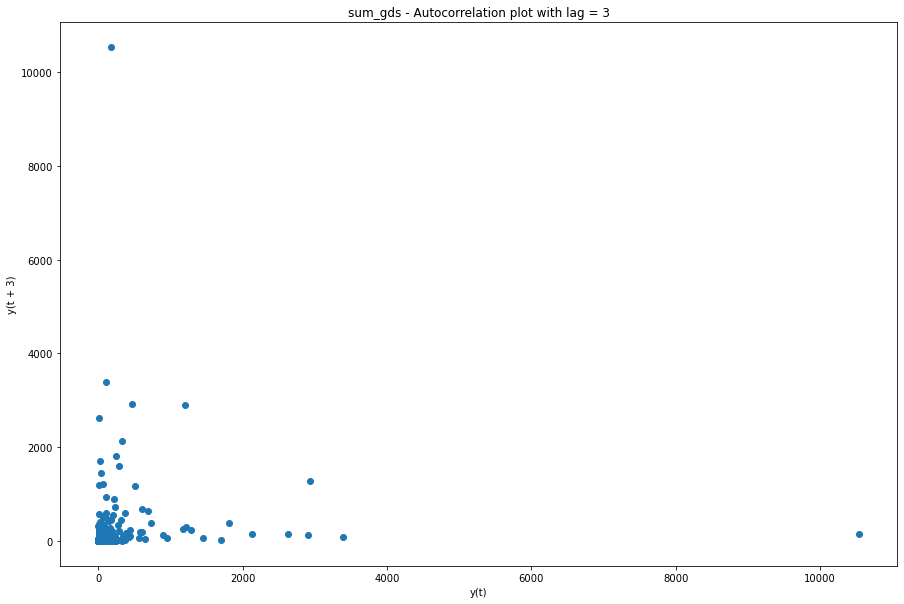

In [115]:
plt.figure(figsize=(15,10))
lag_plot(sum_gds['Price_USD'], lag=3)
plt.title('sum_gds - Autocorrelation plot with lag = 3')
plt.show()

In [116]:
train_df, test_df = sum_gds[0:int(len(sum_gds)*0.7)], sum_gds[int(len(sum_gds)*0.7):]

training_data = train_df['Price_USD'].values
test_data = test_df['Price_USD'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
 
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1696784.4778651309


In [117]:
results_df = test_df.assign(Predicted_Price_USD = model_predictions) 
results_df['Pred_Price_Difference'] = results_df['Predicted_Price_USD']  - results_df['Previous_Price_USD']
results_df['Actual_Price_Difference'] = results_df['Price_USD']  - results_df['Previous_Price_USD']
results_df['Pred_Price_Change'] = np.where(results_df['Pred_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Actual_Price_Change'] = np.where(results_df['Actual_Price_Difference'] >= 0, 'Positive', 'Negative')
results_df['Pred_Price_Change'].tail(1)

Datetime_updated
2021-04-01 00:00:00    Positive
Name: Pred_Price_Change, dtype: object

In [118]:
acc_count = 0

for index, row in results_df.iterrows():
    pred_change = row['Pred_Price_Change']
    actual_change = row['Actual_Price_Change']
    if pred_change == actual_change:
        acc_count += 1

accuracy = acc_count/len(results_df)
print("Accuracy: ", accuracy)

Accuracy:  0.6901408450704225


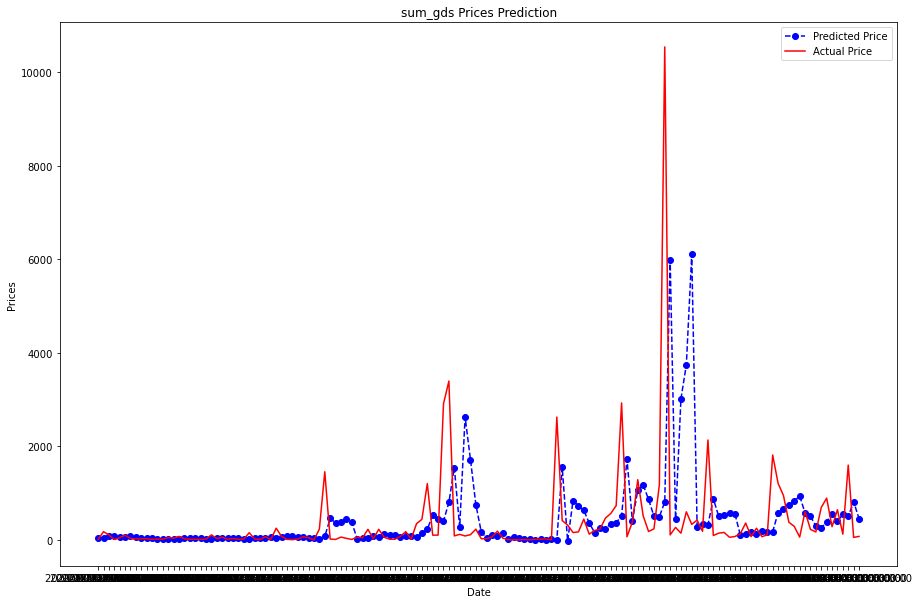

In [119]:
plt.figure(figsize=(15,10))
test_set_range = sum_gds[int(len(sum_gds)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('sum_gds Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

Based on results, there does not seem to be much difference based on the time-frame of the training data.

Next, we will apply a rolling average to the price data, rather than just a daily average.

In [120]:
nft_name

['Cryptokitties - 965763',
 'Etheremon - 43995',
 'Coins-steel - 24',
 'Cryptobots - 7818',
 'Cryptokittie',
 'Godsunchained']

In [121]:
nft_type

['Individual',
 'Individual',
 'Individual',
 'Individual',
 'Collection',
 'Collection']

In [122]:
trans_count

[667, 676, 64, 21, 954008, 236299]

In [123]:
mse_scores

[6.990523738014649,
 4.501662928672594,
 3.31612282786312,
 0.36016319591114526,
 1044218.7579085247,
 1379517.860869704]

In [124]:
binary_acc

[0.5373134328358209,
 0.5763546798029556,
 0.7,
 0.5714285714285714,
 0.6613333333333333,
 0.68]

In [125]:
mse_df = pd.DataFrame()
mse_df['NFT Name'] = nft_name
mse_df['NFT Type'] = nft_type
mse_df['Transaction Count'] = trans_count
mse_df['MSE Score'] = mse_scores
mse_df['Pos/Neg Accuracy'] = binary_acc
mse_df['Pos/Neg Precision'] = binary_prec
mse_df['Pos/Neg Recall'] = binary_recall
mse_df['Pos/Neg F1 Score'] = binary_f1score

mse_df

,NFT Name,NFT Type,Transaction Count,MSE Score,Pos/Neg Accuracy,Pos/Neg Precision,Pos/Neg Recall,Pos/Neg F1 Score
0,Cryptokitties - 965763,Individual,667,6.990524e+00,0.537313,0.834646,0.595506,0.695082
1,Etheremon - 43995,Individual,676,4.501663e+00,0.576355,0.835714,0.650000,0.731250
2,Coins-steel - 24,Individual,64,3.316123e+00,0.700000,0.928571,0.722222,0.812500
3,Cryptobots - 7818,Individual,21,3.601632e-01,0.571429,0.800000,0.666667,0.727273
4,Cryptokittie,Collection,954008,1.044219e+06,0.661333,0.663717,0.746269,0.702576
5,Godsunchained,Collection,236299,1.379518e+06,0.680000,0.680000,0.739130,0.708333


### Rolling Average for NFT Colelctions

In [126]:
nft_col_df['10d_ra'] = nft_col_df.groupby('Collection_cleaned')['Price_USD'].transform(lambda x: x.rolling(10, 1).mean())
nft_col_df['30d_ra'] = nft_col_df.groupby('Collection_cleaned')['Price_USD'].transform(lambda x: x.rolling(30, 1).mean())
nft_col_df['90d_ra'] = nft_col_df.groupby('Collection_cleaned')['Price_USD'].transform(lambda x: x.rolling(90, 1).mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [99]:
nft_col_df.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,10d_ra,30d_ra,90d_ra
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games,0,0.030318,0.030318,0.030318
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games,1,0.113693,0.113693,0.113693
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games,2,0.085901,0.085901,0.085901
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games,3,0.147800,0.147800,0.147800
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games,4,0.154622,0.154622,0.154622


In [100]:
guc_ra = nft_col_df[nft_col_df['Collection_cleaned'] == "Godsunchained"]
guc_ra.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,10d_ra,30d_ra,90d_ra
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games,0,0.030318,0.030318,0.030318
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games,1,0.113693,0.113693,0.113693
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games,2,0.085901,0.085901,0.085901
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games,3,0.147800,0.147800,0.147800
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games,4,0.154622,0.154622,0.154622


<AxesSubplot:xlabel='Datetime_updated', ylabel='Price_USD'>

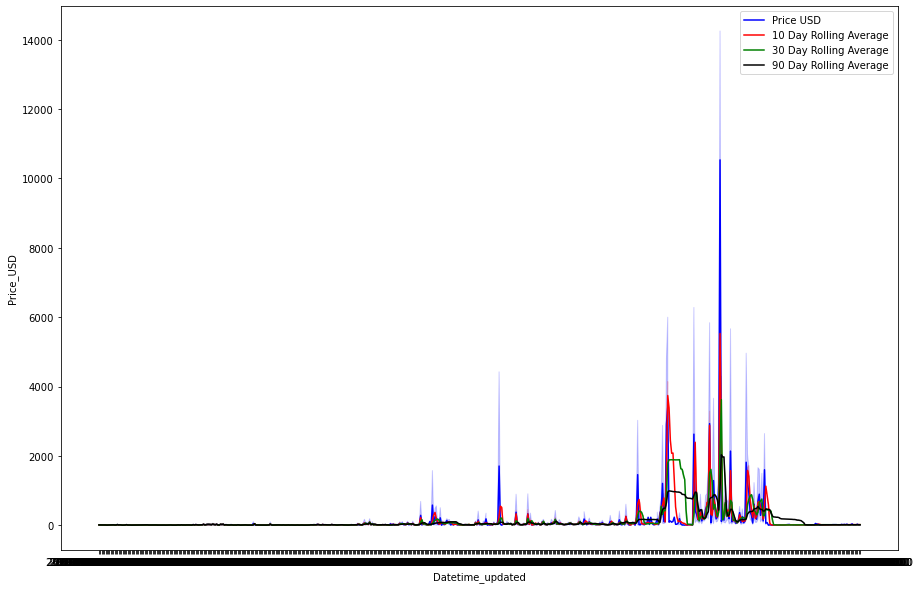

In [101]:
plt.figure(figsize=(15,10))
sns.lineplot(data=guc_ra, x="Datetime_updated", y="Price_USD", color = 'blue', label='Price USD')
sns.lineplot(data=guc_ra, x="Datetime_updated", y="10d_ra", color = 'red', label='10 Day Rolling Average')
sns.lineplot(data=guc_ra, x="Datetime_updated", y="30d_ra", color = 'green', label='30 Day Rolling Average')
sns.lineplot(data=guc_ra, x="Datetime_updated", y="90d_ra", color = 'black', label='90 Day Rolling Average')

#### 10 Day Rolling Average

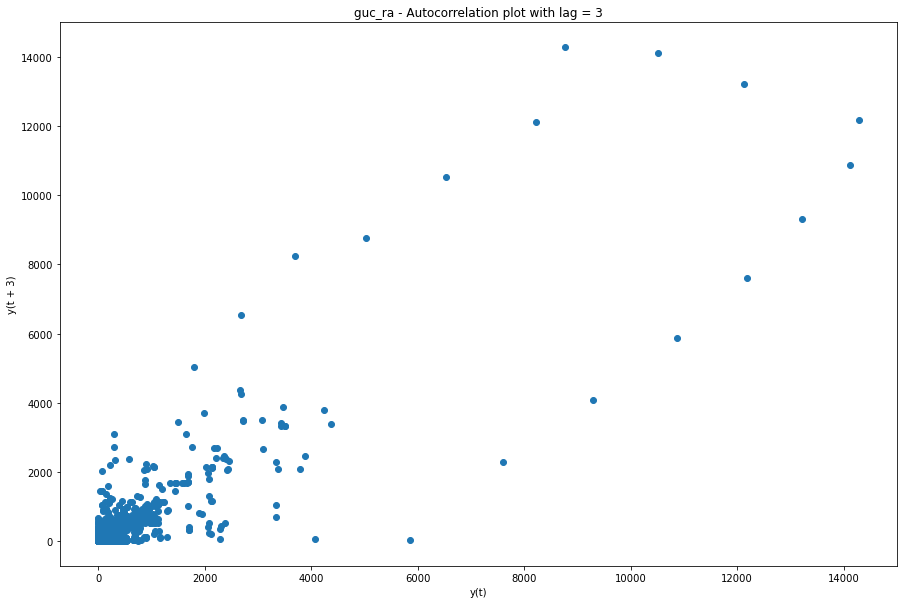

In [102]:
plt.figure(figsize=(15,10))
lag_plot(guc_ra['10d_ra'], lag=3)
plt.title('guc_ra - Autocorrelation plot with lag = 3')
plt.show()

In [103]:
train_data, test_data = guc_ra[0:int(len(guc_ra)*0.7)], guc_ra[int(len(guc_ra)*0.7):]

training_data = train_data['10d_ra'].values
test_data = test_data['10d_ra'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
print(N_test_observations)

70920


In [104]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
    if time_point % 100 == 0: 
        print(time_point)
 
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

0
100
200
300
400
500
600
700
800
900
1000


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15,10))
test_set_range = guc_ra[int(len(guc_ra)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('10-Day Rolling Avg. Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

#### 30 Day Rolling Average

In [ ]:
plt.figure(figsize=(15,10))
lag_plot(guc_ra['30d_ra'], lag=3)
plt.title('guc_ra - Autocorrelation plot with lag = 3')
plt.show()

In [ ]:
train_data, test_data = guc_ra[0:int(len(guc_ra)*0.7)], guc_ra[int(len(guc_ra)*0.7):]

training_data = train_data['30d_ra'].values
test_data = test_data['30d_ra'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
 
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

In [ ]:
plt.figure(figsize=(15,10))
test_set_range = guc_ra[int(len(guc_ra)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('30-Day Rolling Avg. Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

#### 90 Day Rolling Average

In [ ]:
plt.figure(figsize=(15,10))
lag_plot(guc_ra['90d_ra'], lag=3)
plt.title('guc_ra - Autocorrelation plot with lag = 3')
plt.show()

In [ ]:
train_data, test_data = guc_ra[0:int(len(guc_ra)*0.7)], guc_ra[int(len(guc_ra)*0.7):]

training_data = train_data['90d_ra'].values
test_data = test_data['90d_ra'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
 
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

In [ ]:
plt.figure(figsize=(15,10))
test_set_range = guc_ra[int(len(guc_ra)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('90-Day Rolling Avg. Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()